<a href="https://colab.research.google.com/github/Arnavv04/EDA_Assignment/blob/main/theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv"
data = pd.read_csv(url)

In [34]:
# 3. Explore Dataset Dimension and Summary
data.shape

(1592, 11)

In [35]:
data.info()  # Overview of the dataset including data types and missing values

data.head()  # Display first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1592 non-null   int64  
 1   Gunnel    1592 non-null   int64  
 2   Time      1592 non-null   int64  
 3   Fromlow   1592 non-null   int64  
 4   Slope     1592 non-null   int64  
 5   Rw        1592 non-null   float64
 6   Amphiso   1592 non-null   int64  
 7   Subst     1592 non-null   int64  
 8   Pool      1592 non-null   int64  
 9   Water     1592 non-null   int64  
 10  Cobble    1592 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.9 KB


,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0


In [36]:
data.describe()  # Statistical summary of numerical columns

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,796.500000,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,459.715129,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,1.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,398.750000,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,796.500000,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1194.250000,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1592.000000,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


In [37]:
# 4. Data Handling: Check for Missing Values
data.isnull().sum()  # Check for missing values in each column

,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


In [38]:
# 5. Data Cleaning (Not Required)
# If needed, drop or fill missing values
# Example: Uncomment if you need to drop rows with missing values
# data = data.dropna()

# If necessary, adjust data types (convert object to appropriate types)
# Example:
# data['column_name'] = data['column_name'].astype('desired_type')

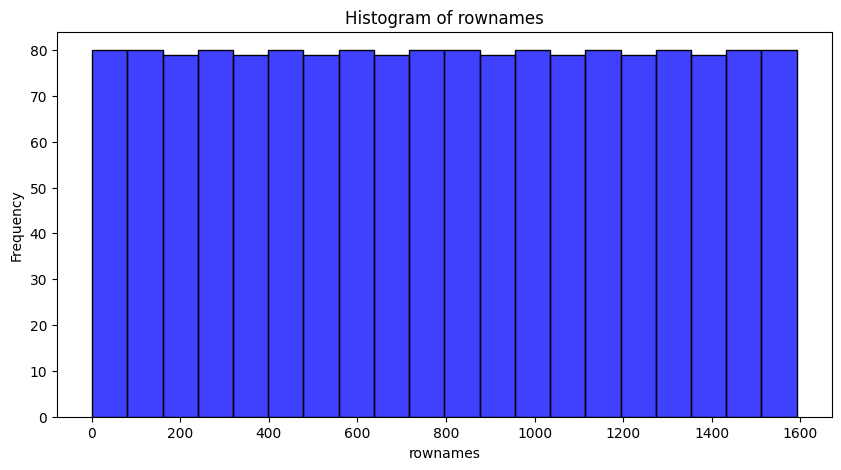

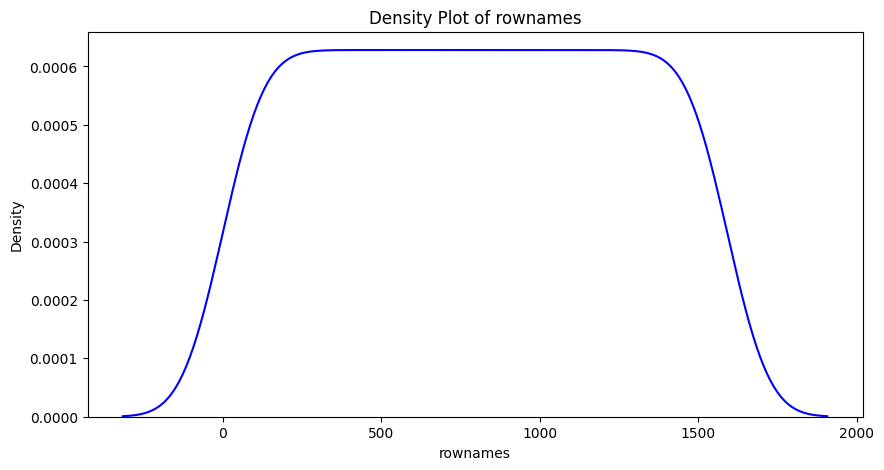

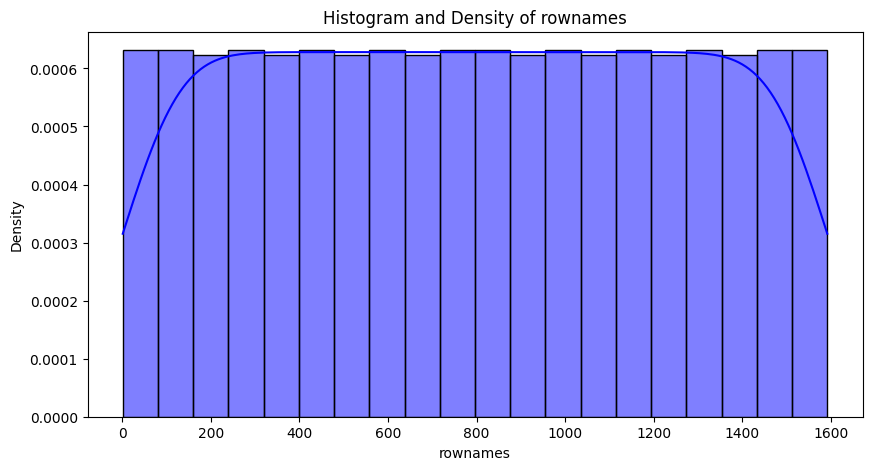

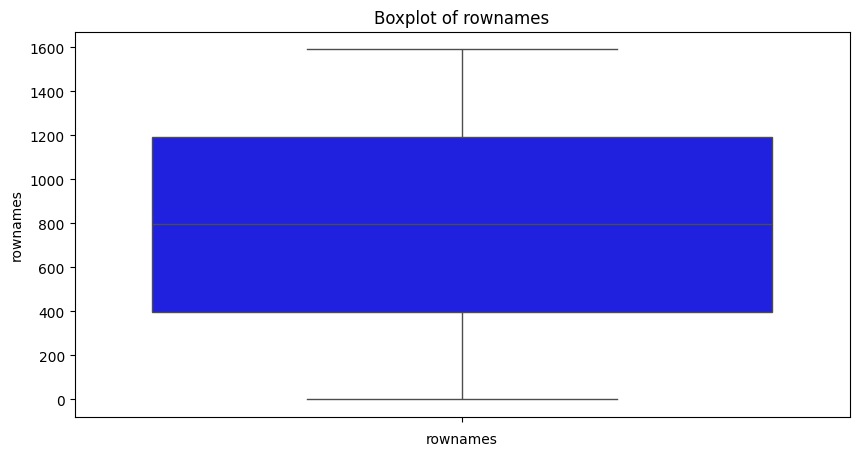

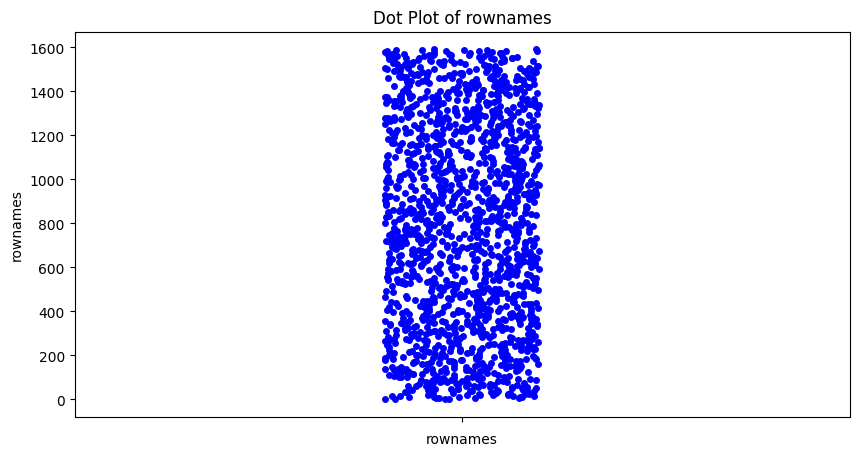

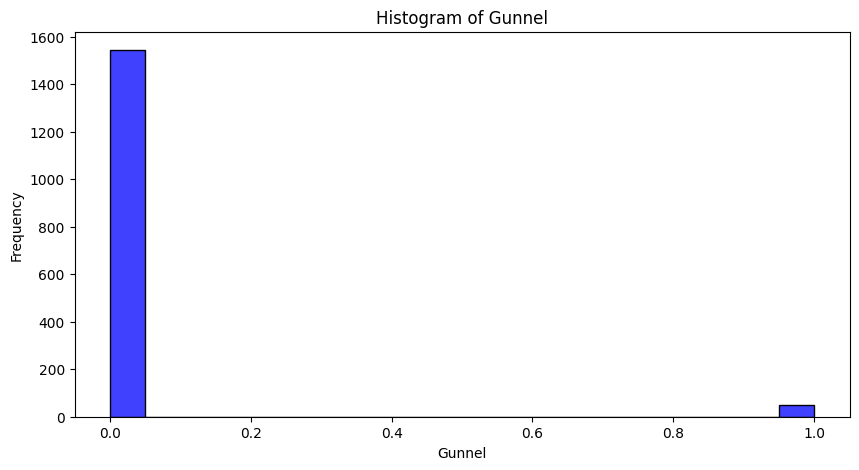

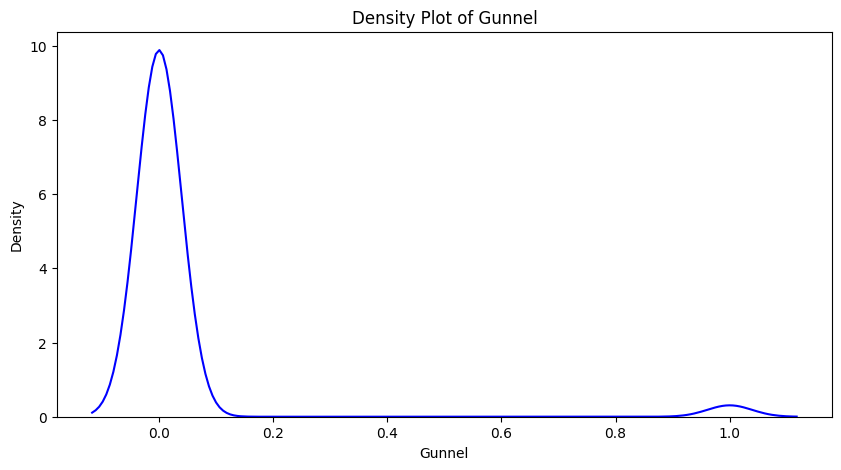

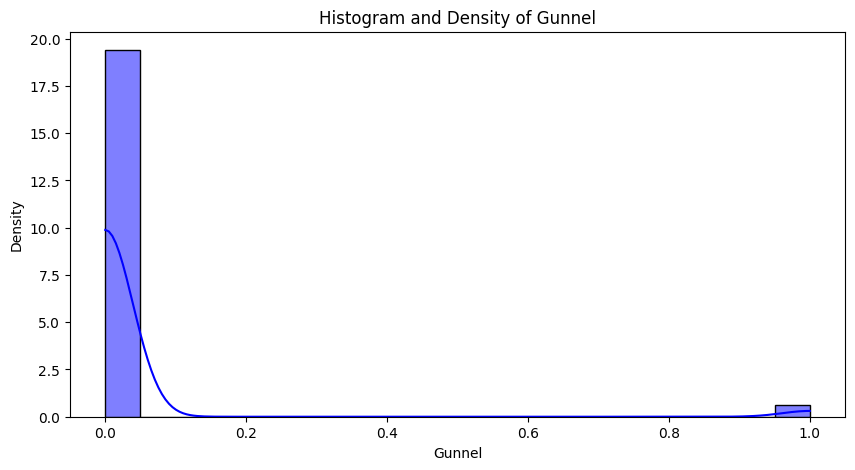

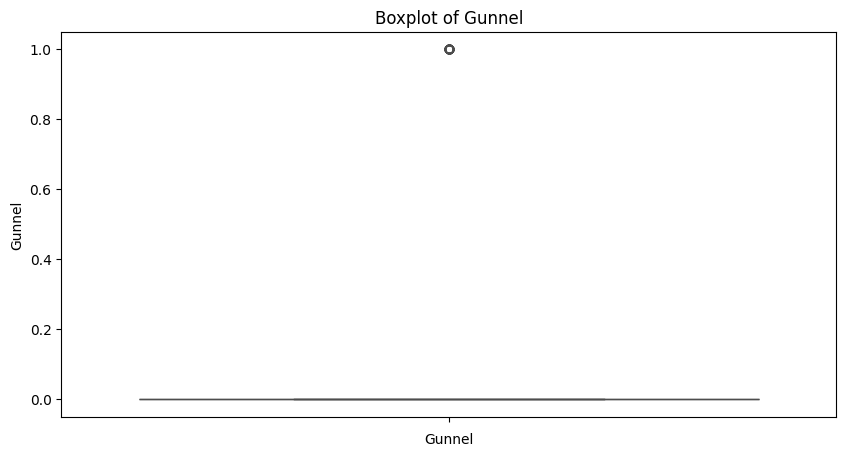

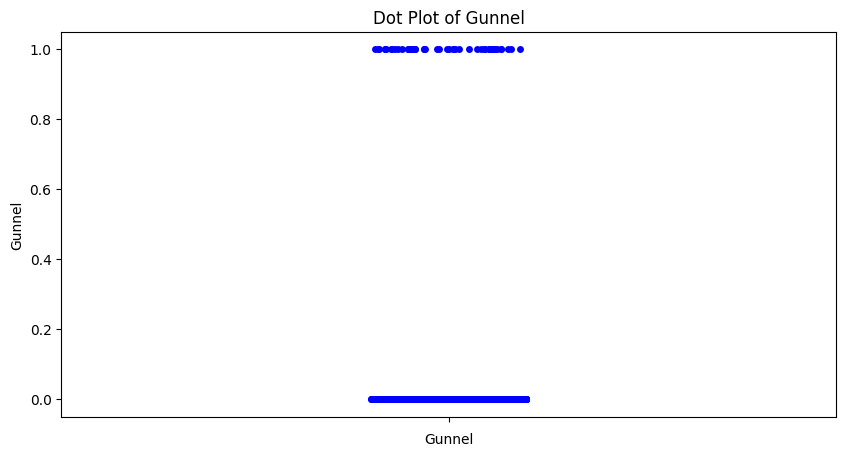

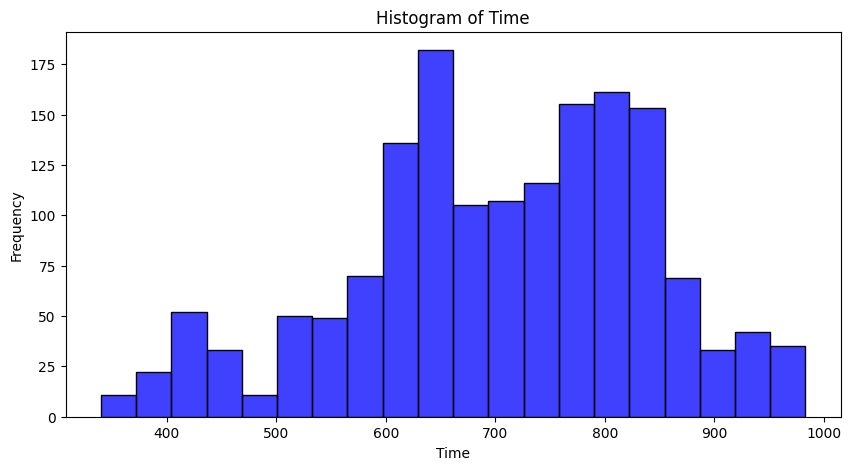

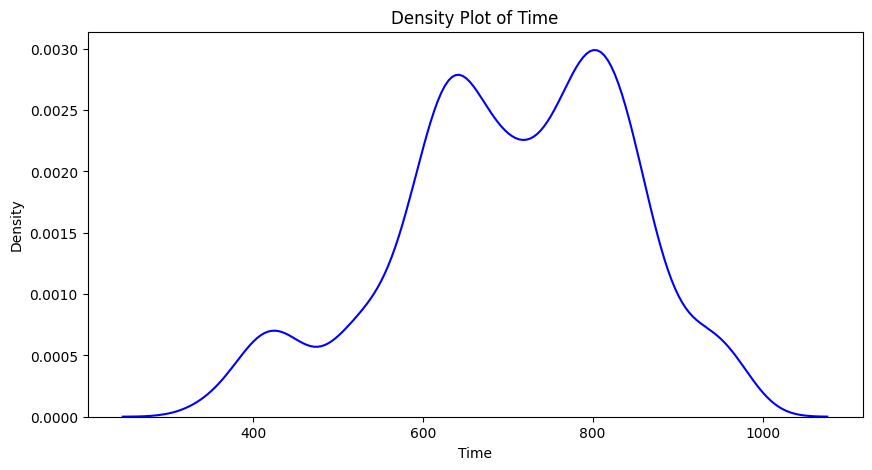

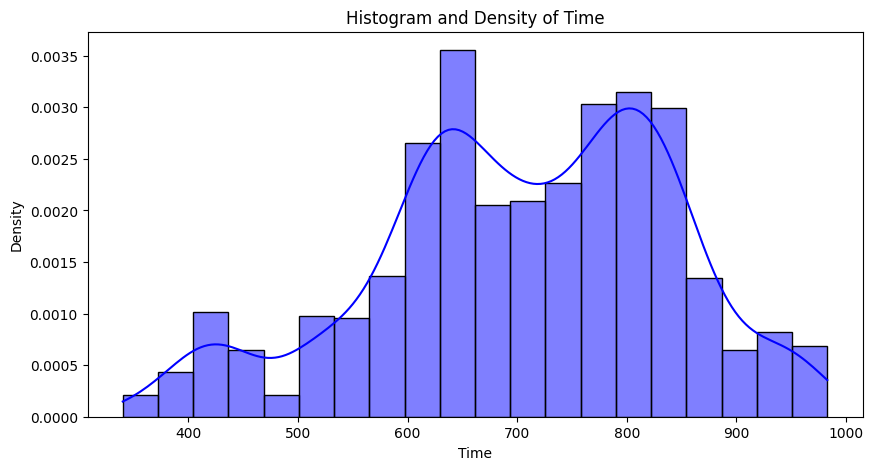

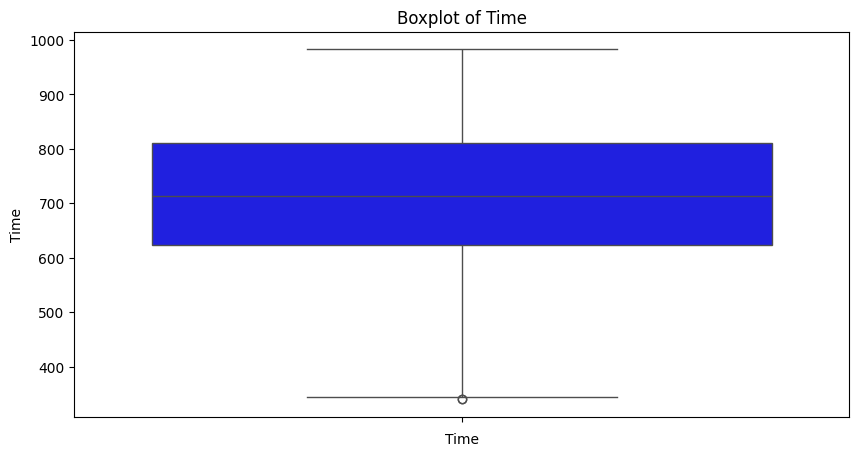

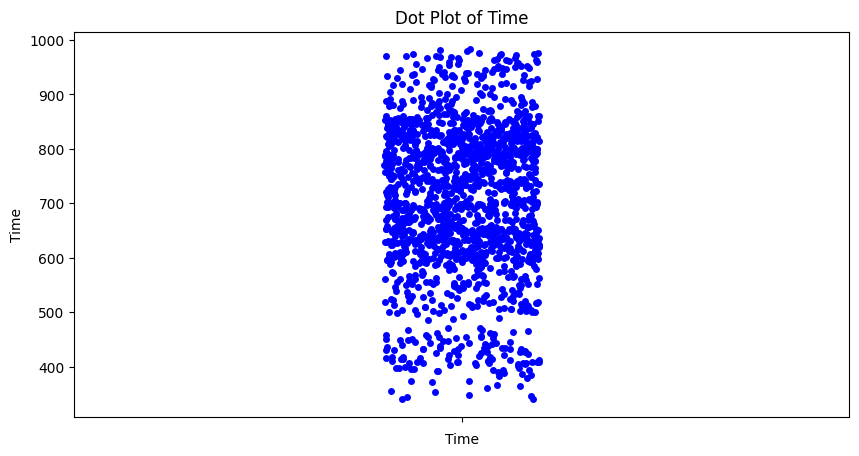

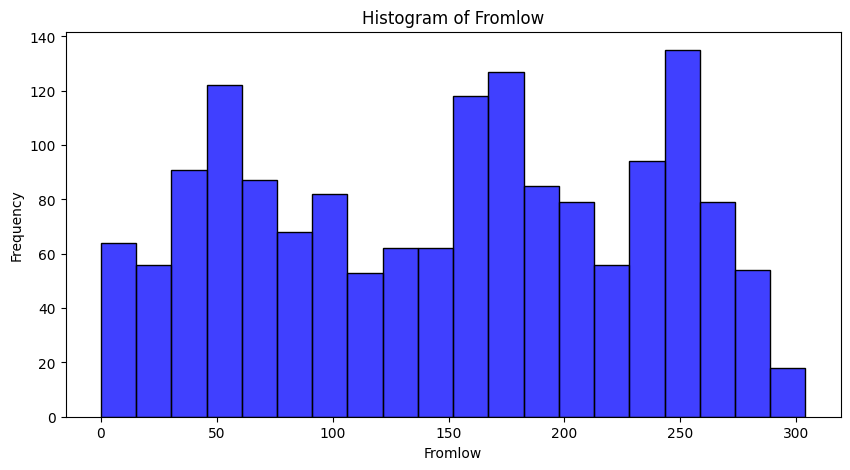

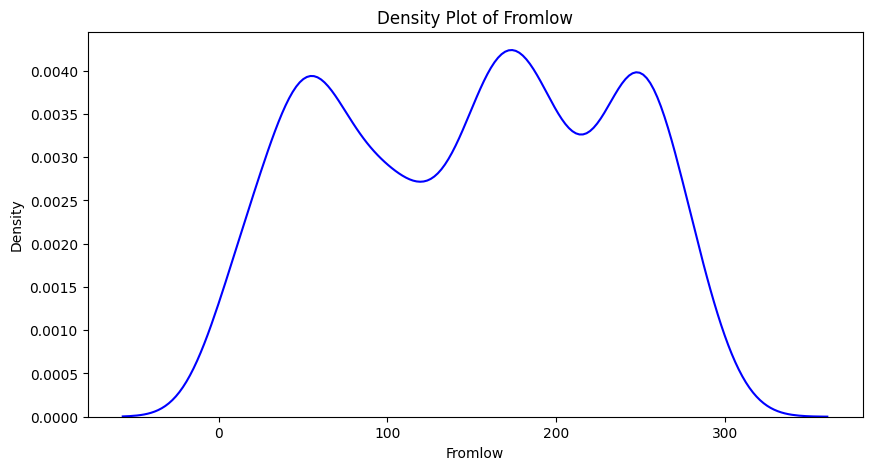

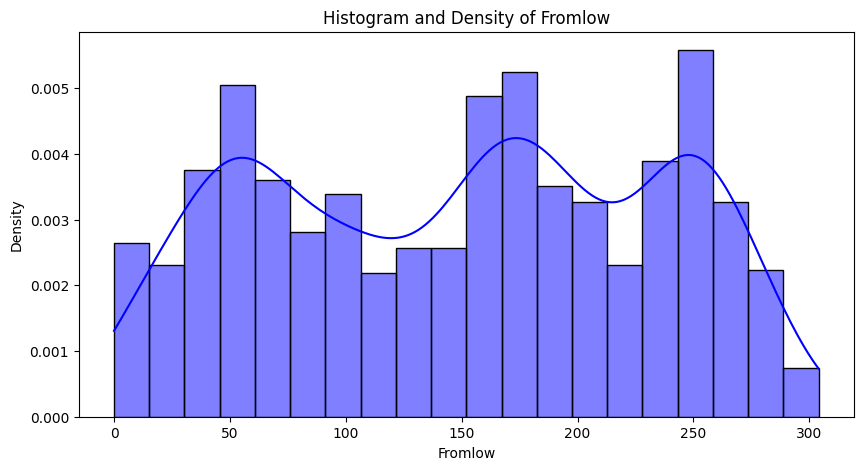

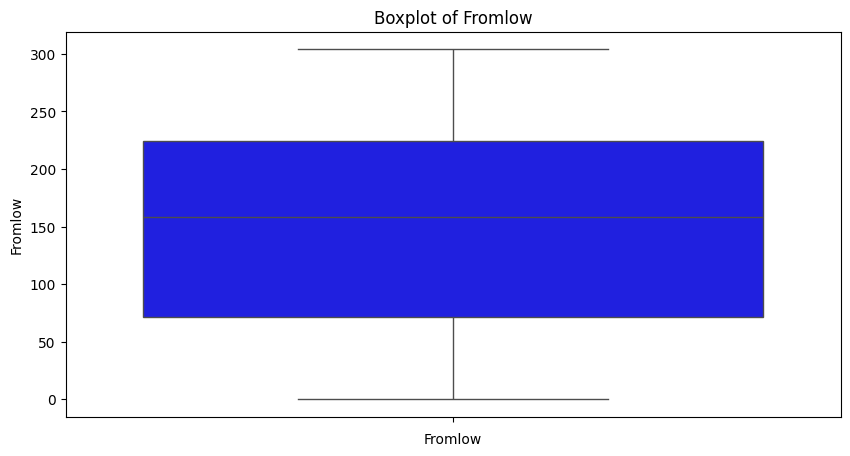

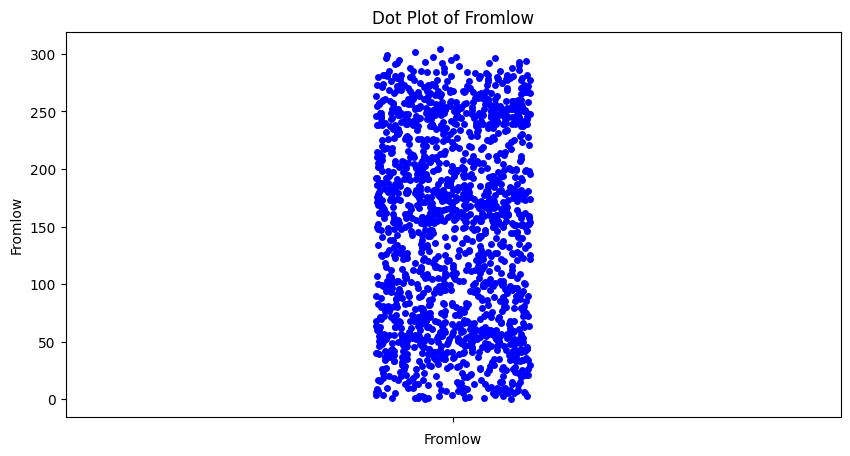

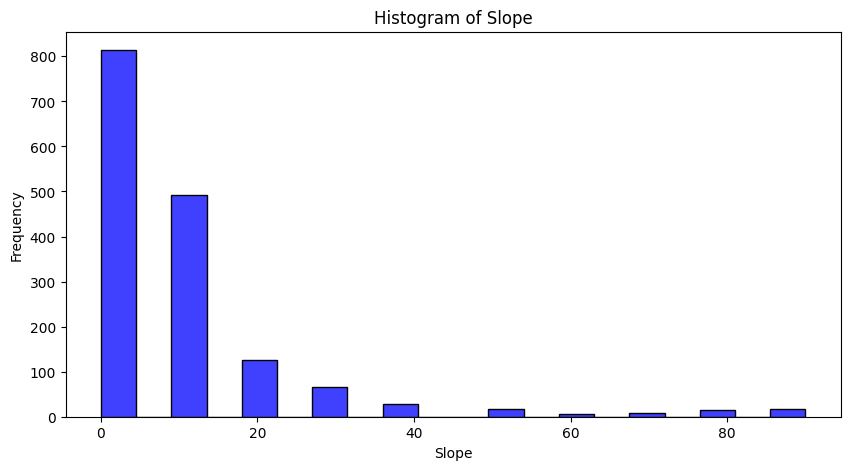

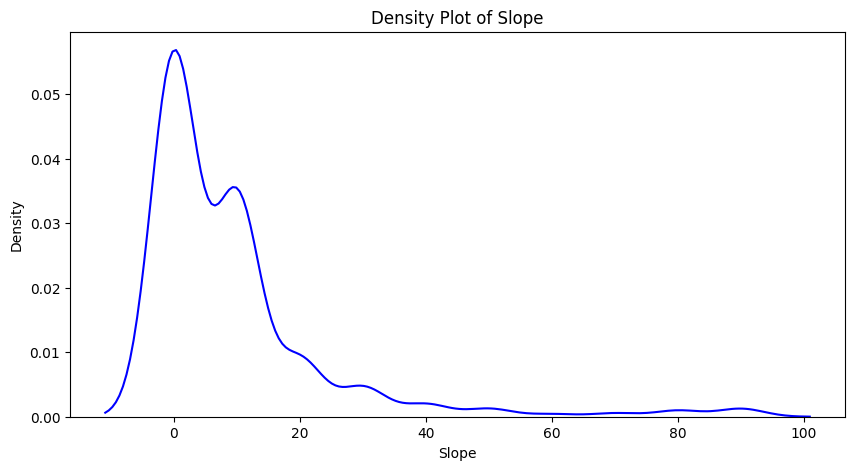

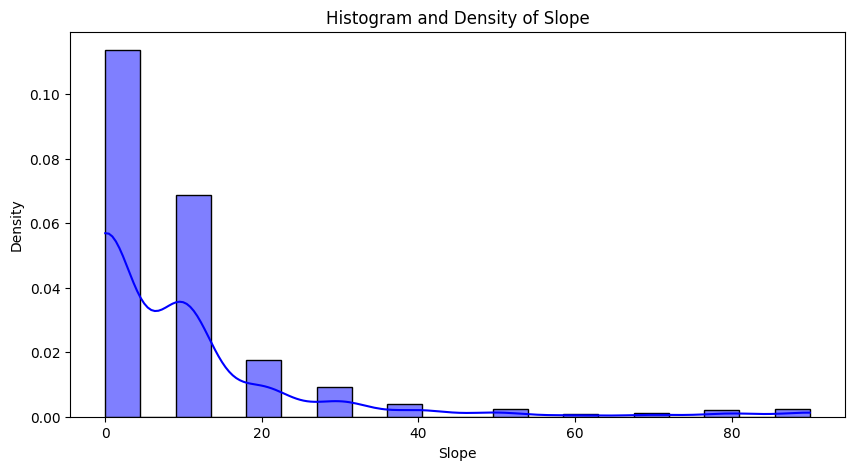

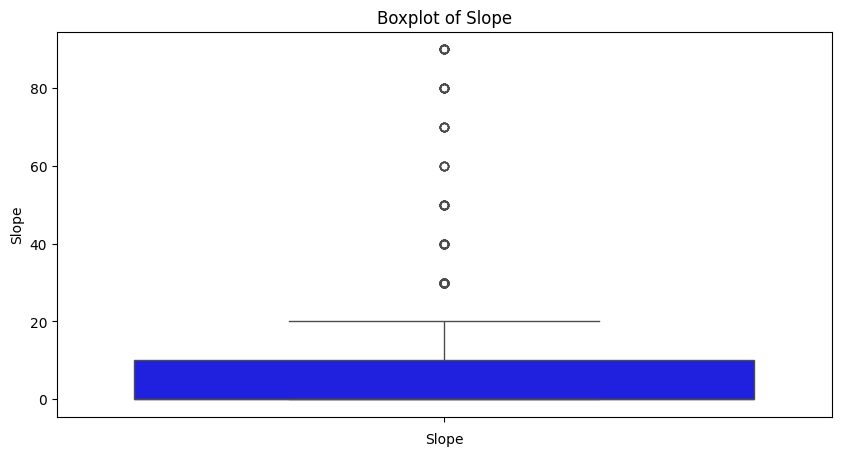

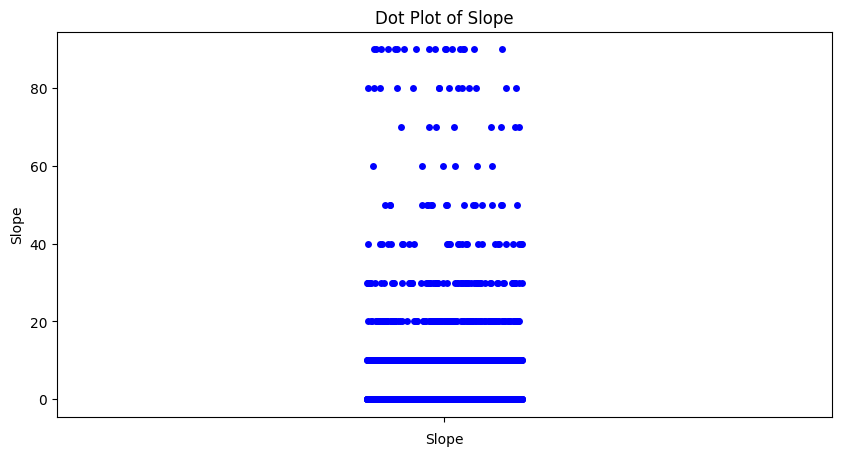

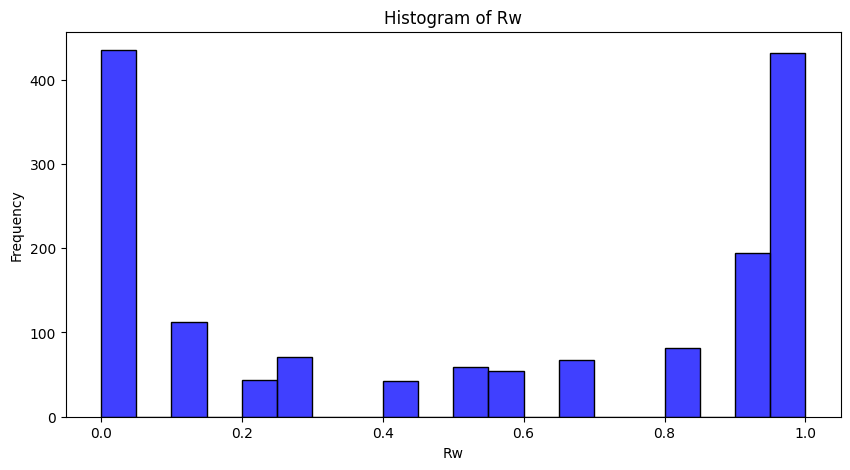

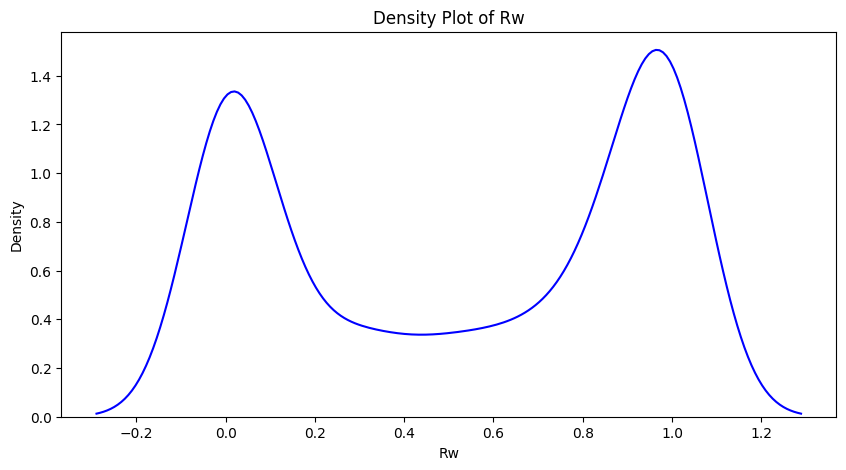

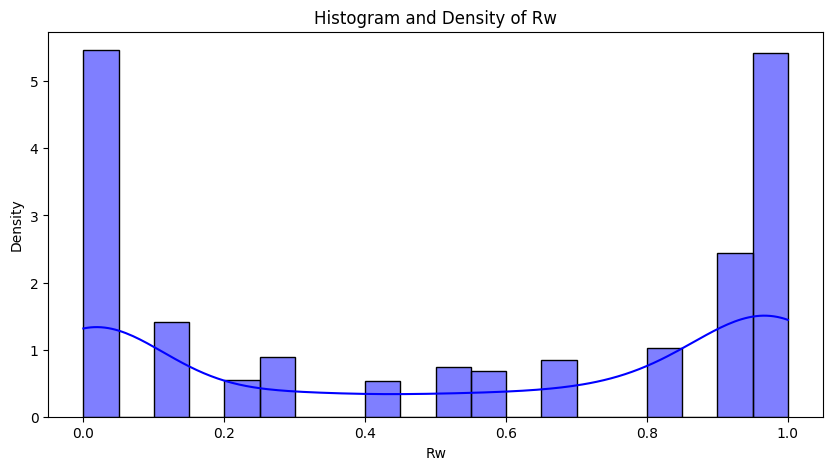

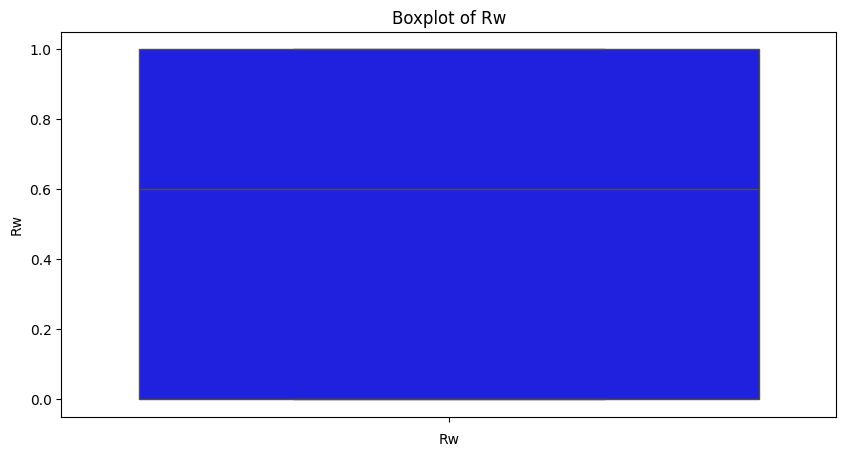

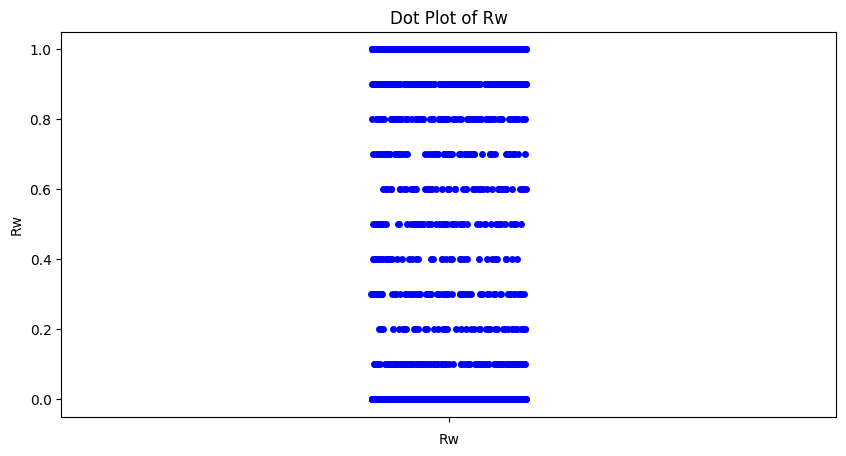

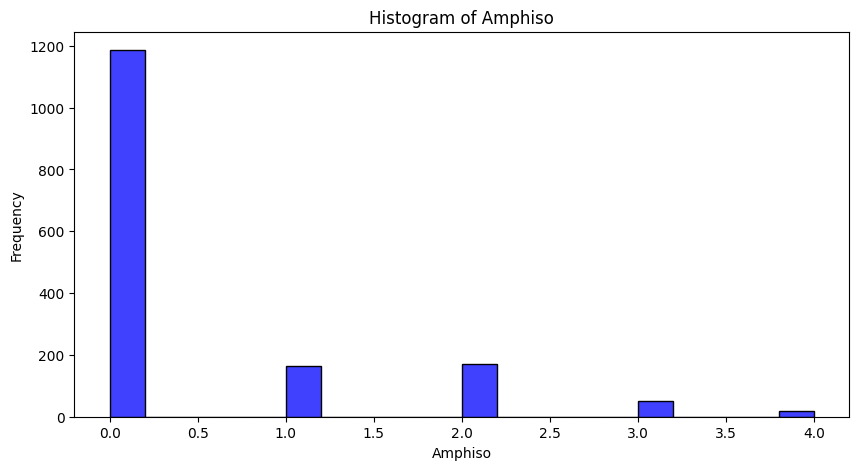

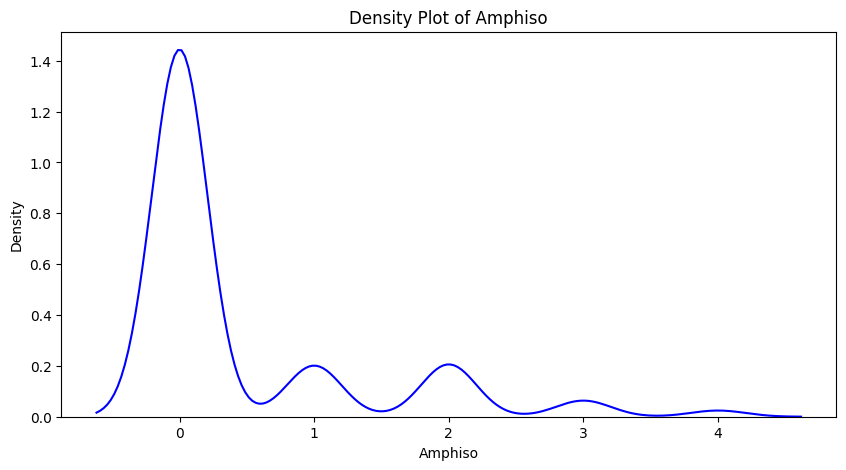

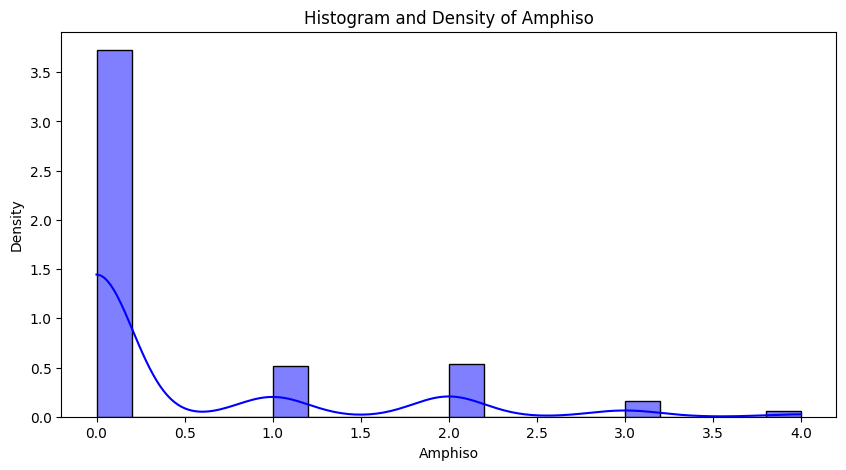

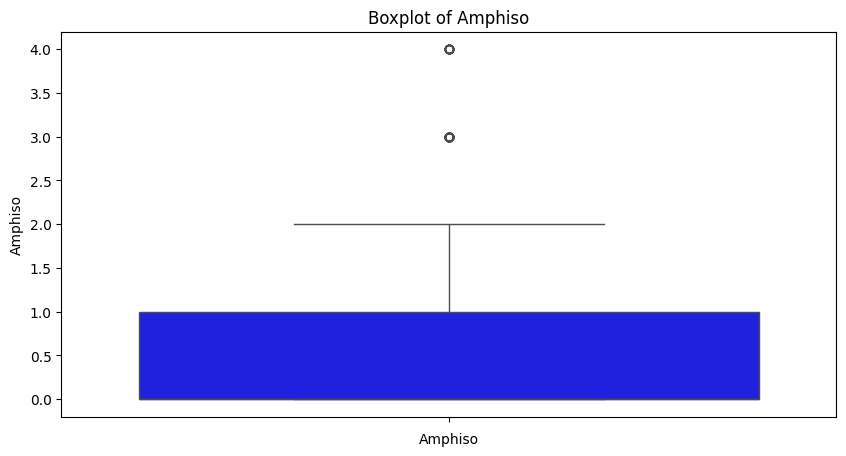

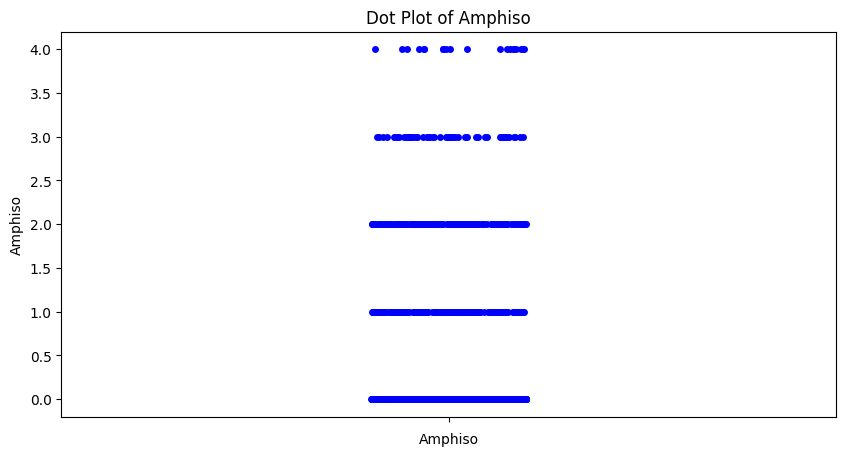

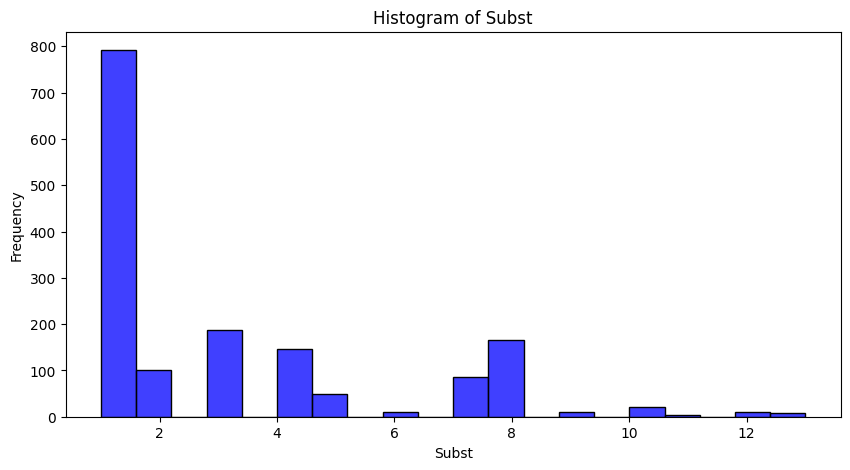

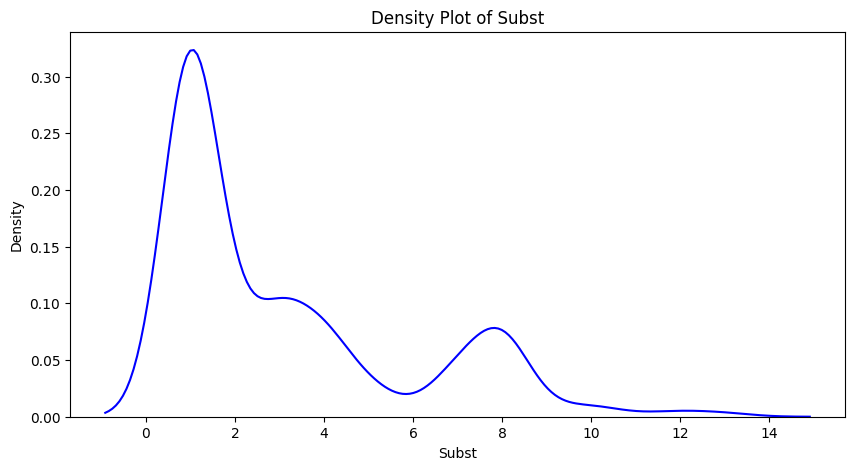

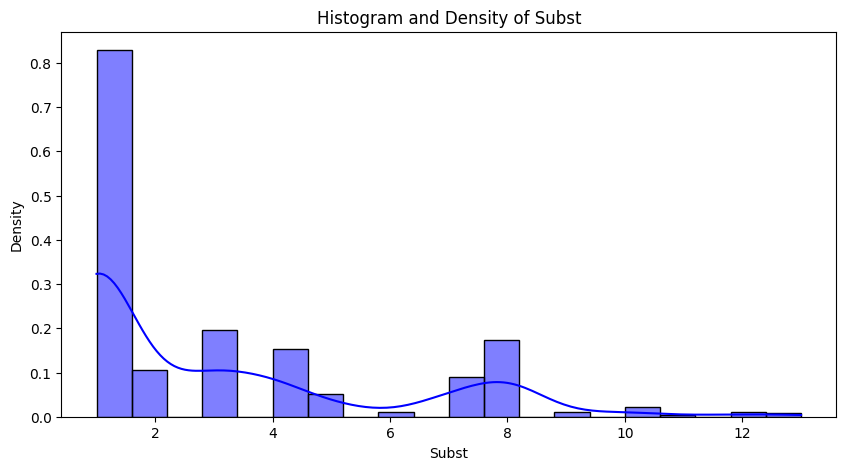

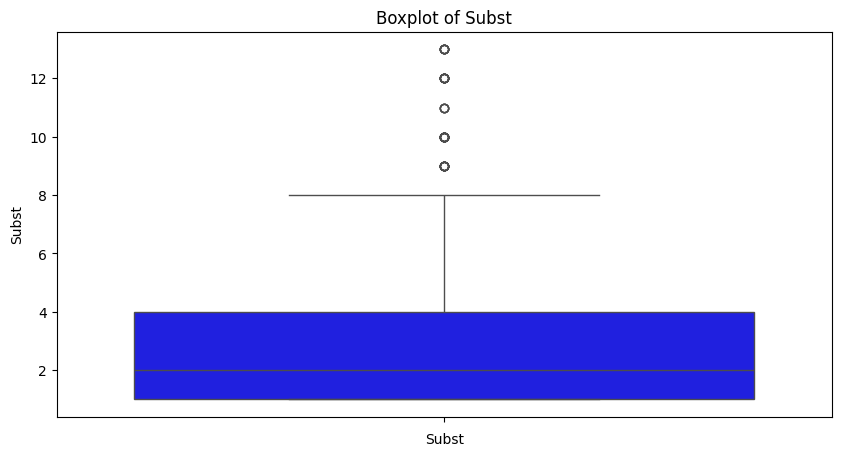

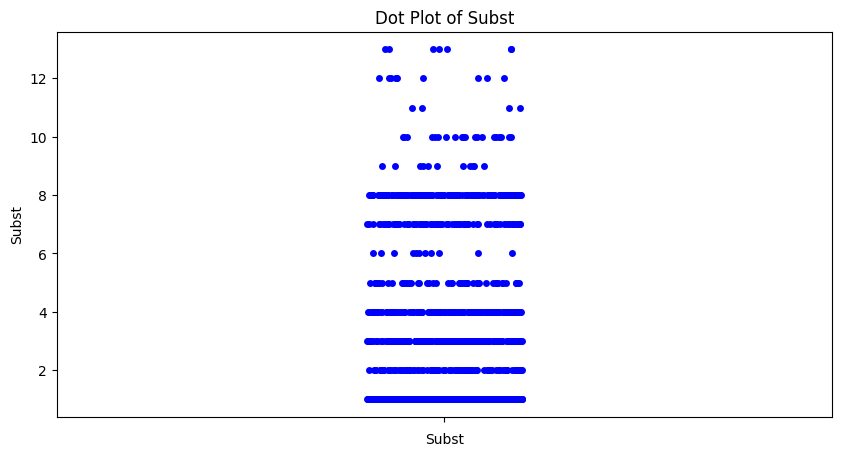

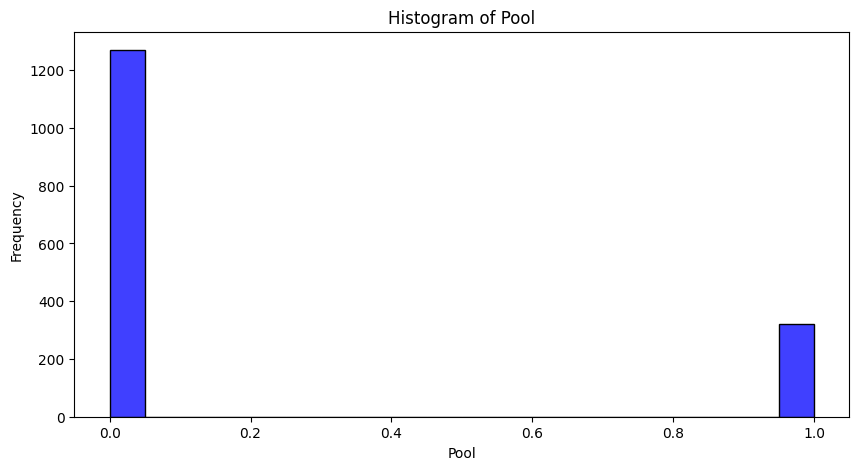

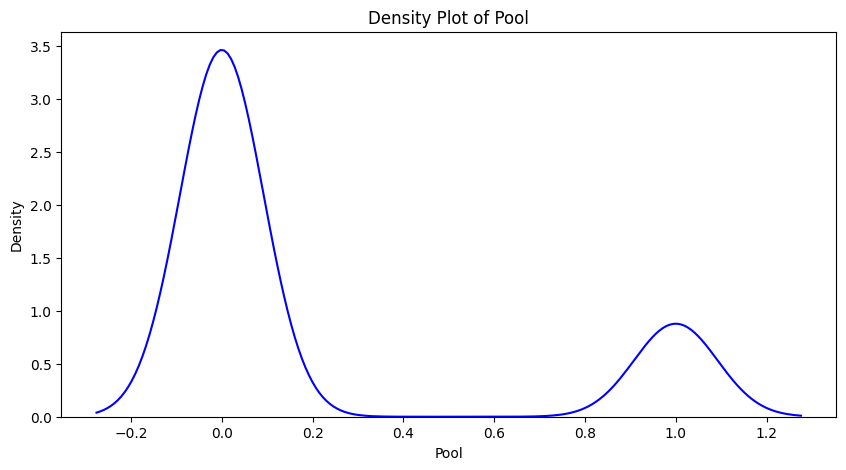

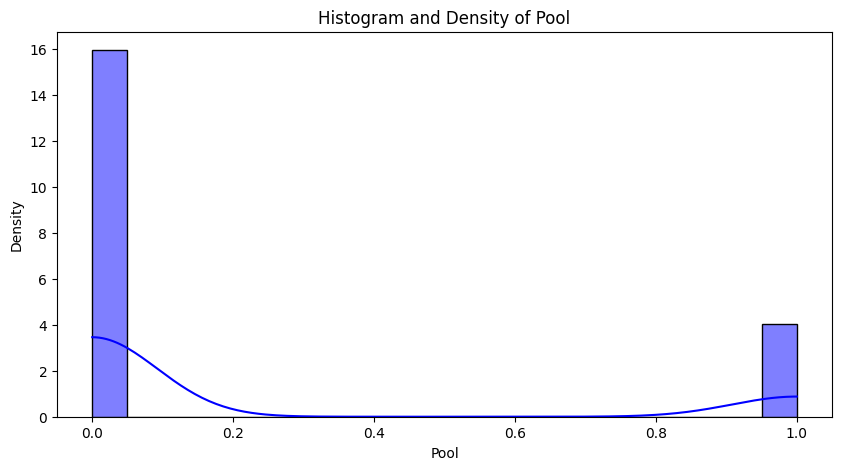

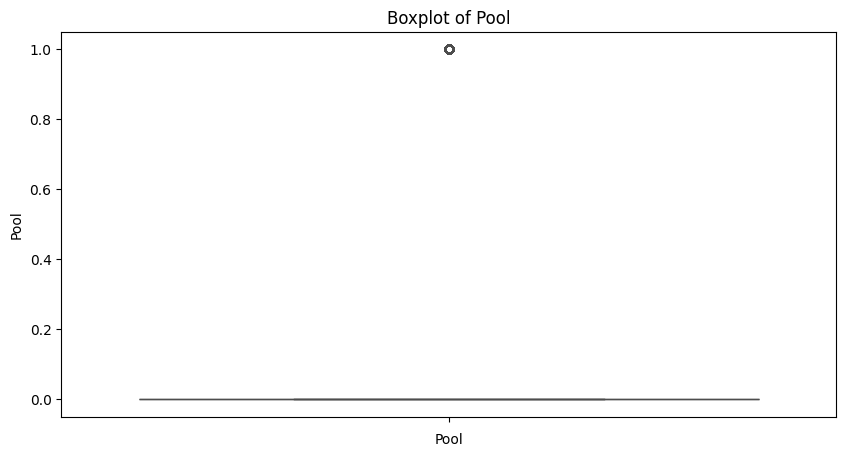

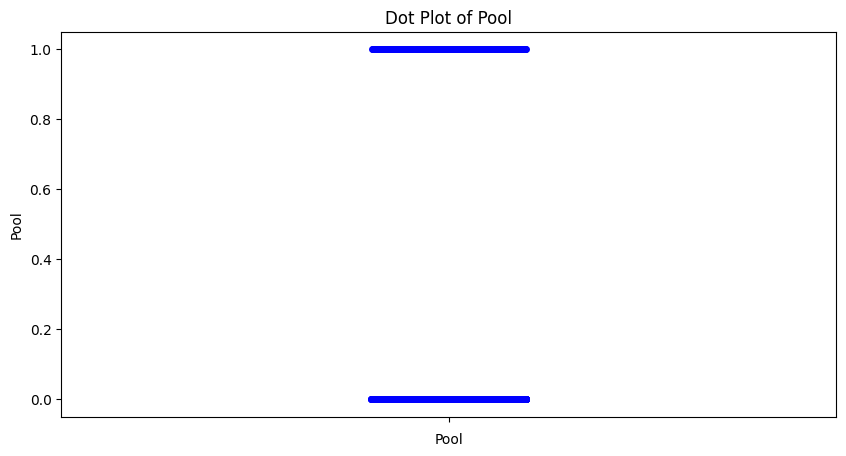

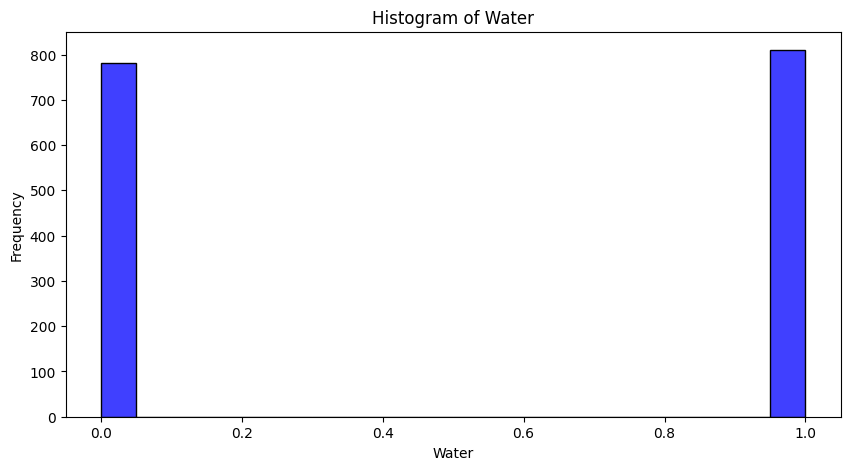

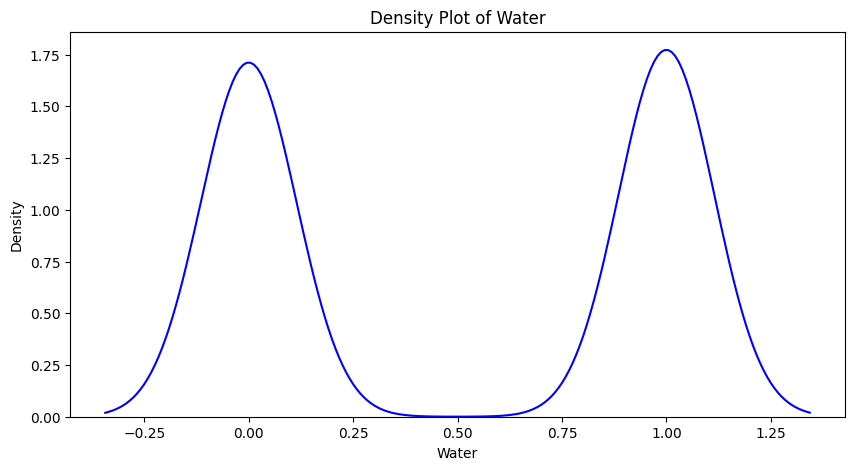

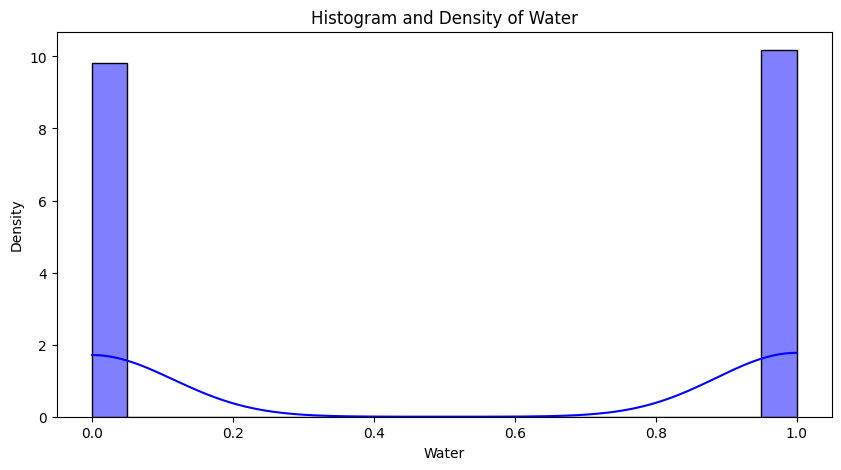

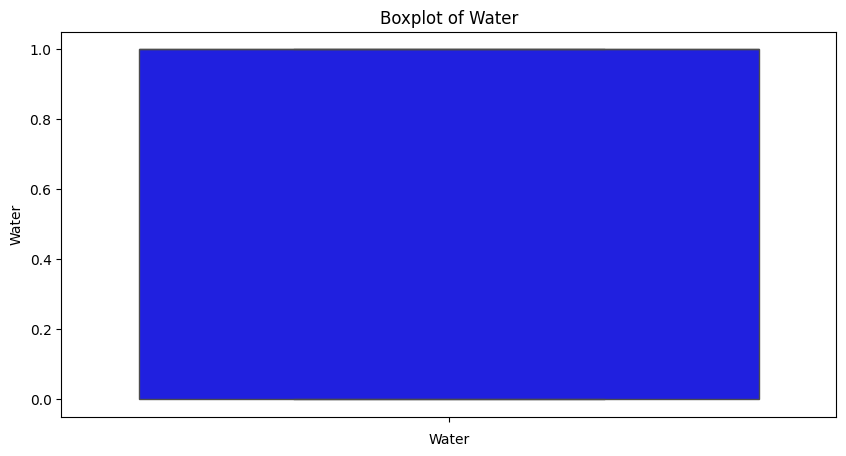

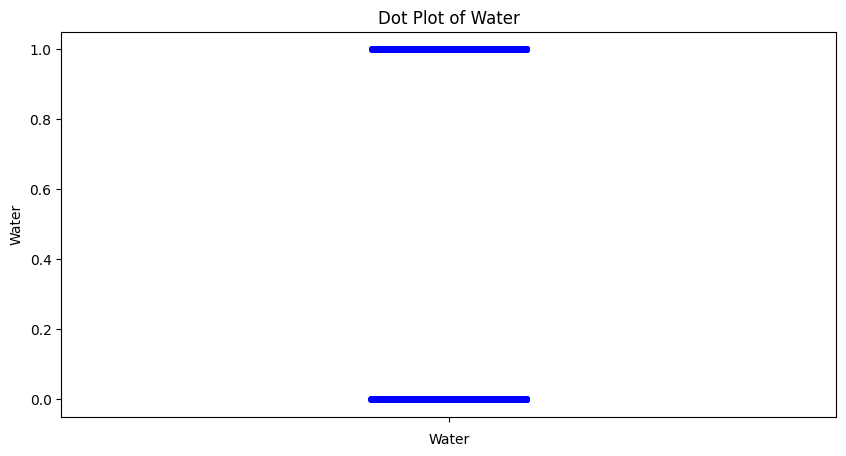

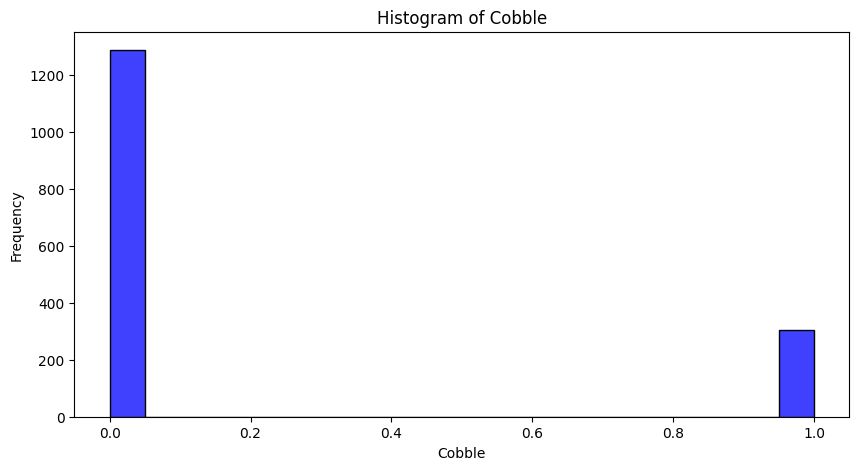

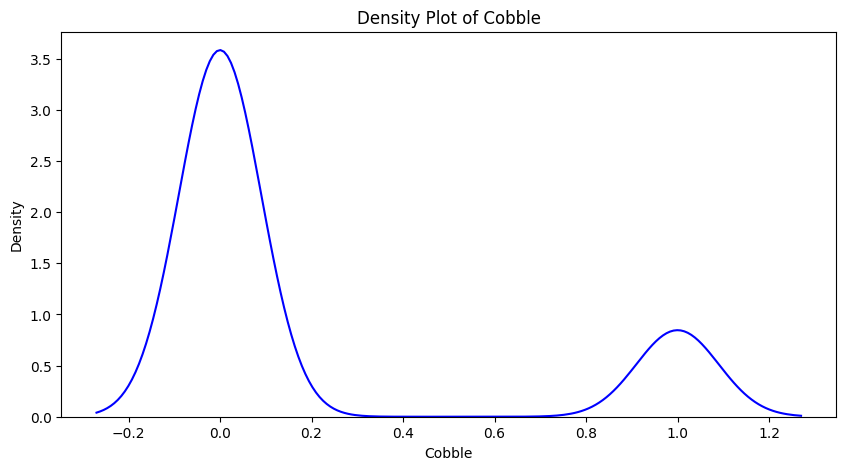

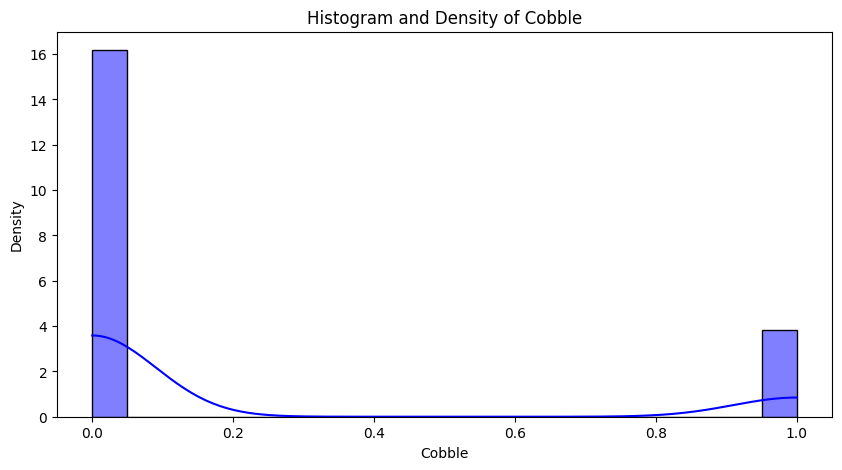

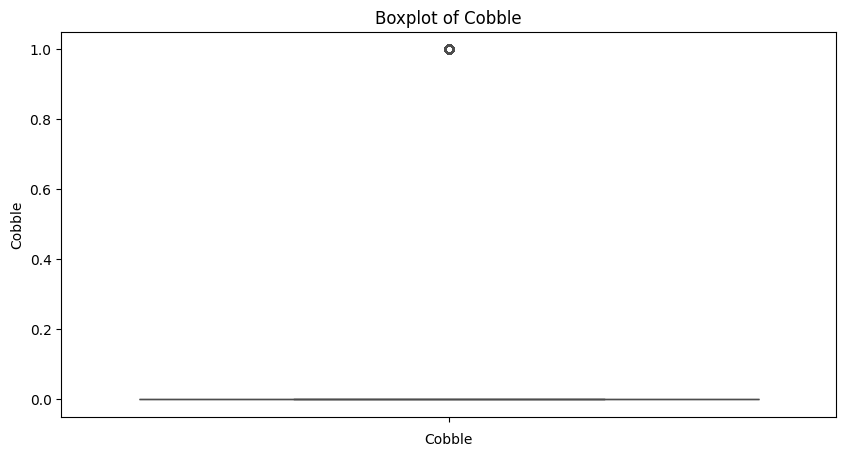

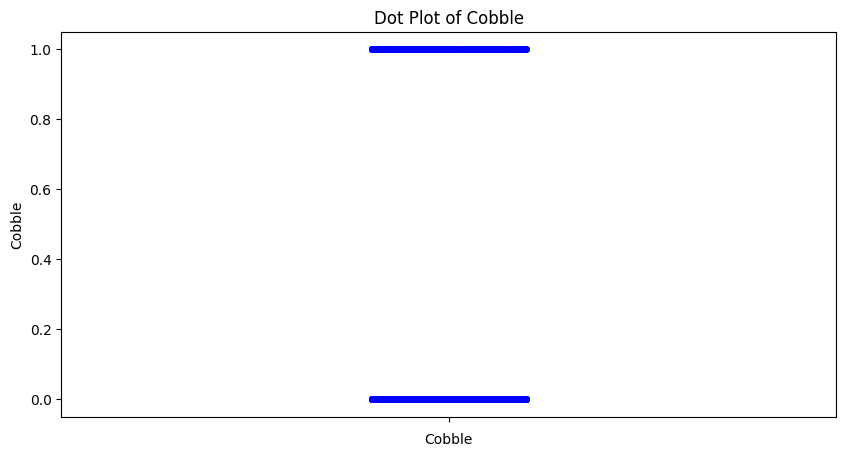

In [39]:
# 6. Univariate Analysis
# Function to create univariate plots
def plot_univariate(data, column):
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=20, color='blue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Density Plot
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[column], color='blue')
    plt.title(f"Density Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

    # Histogram and Density
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=20, color='blue', stat="density", kde=True)
    plt.title(f"Histogram and Density of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[column], color='blue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

    # Dot Plot
    plt.figure(figsize=(10, 5))
    sns.stripplot(data[column], jitter=True, color='blue')
    plt.title(f"Dot Plot of {column}")
    plt.xlabel(column)
    plt.show()

# Loop through numerical columns for plotting
for column in data.select_dtypes(include=[np.number]).columns:
    plot_univariate(data, column)

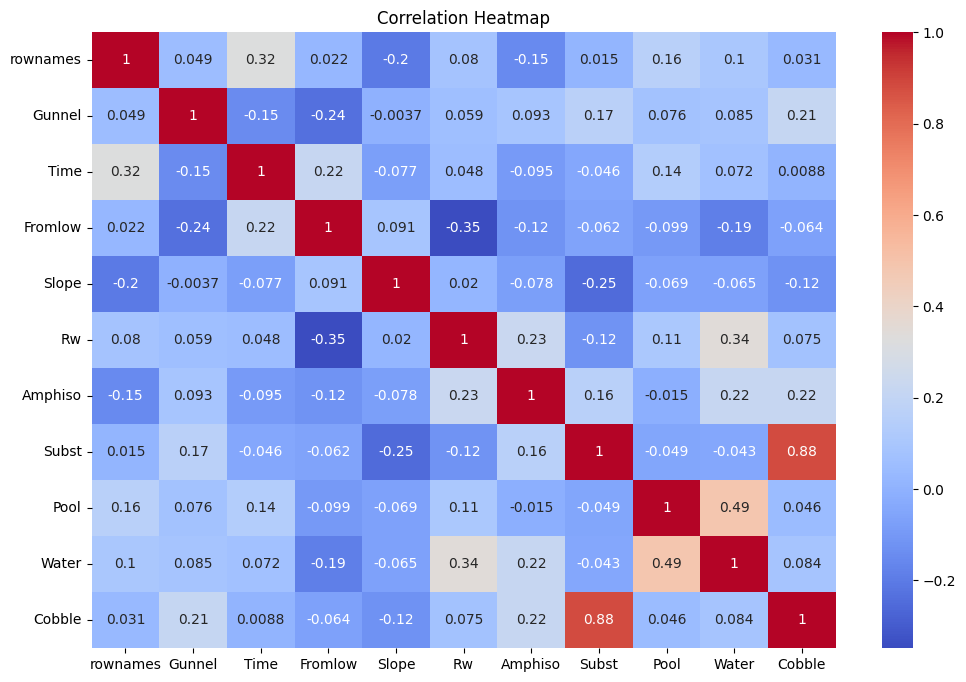

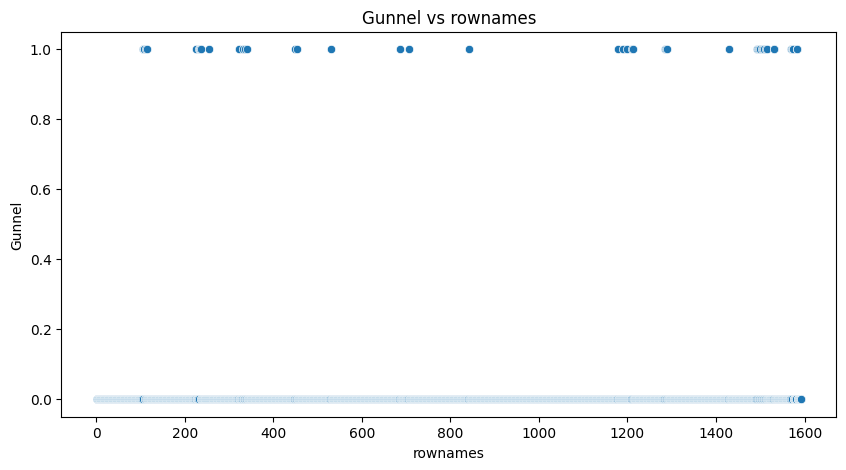

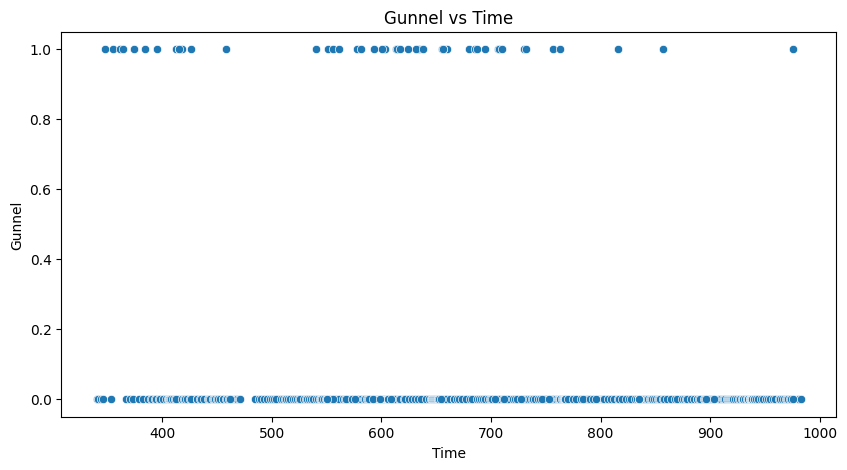

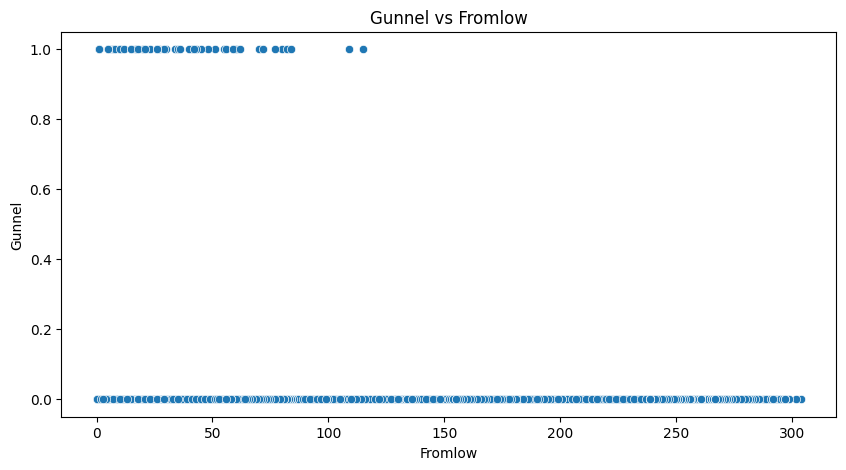

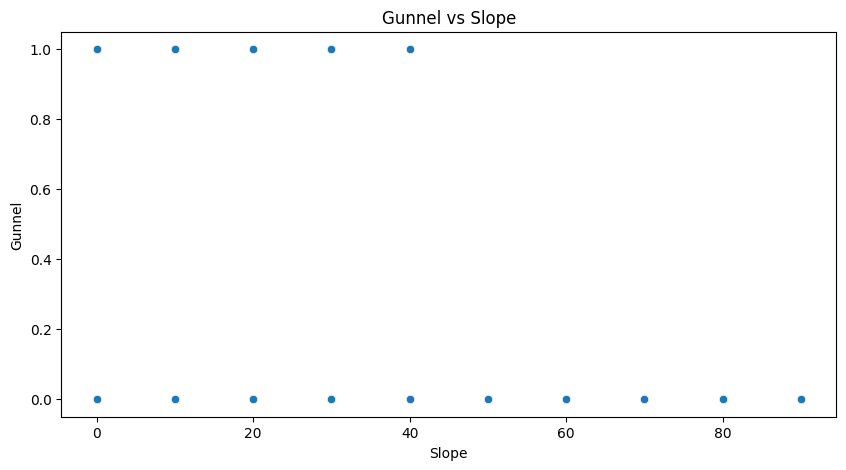

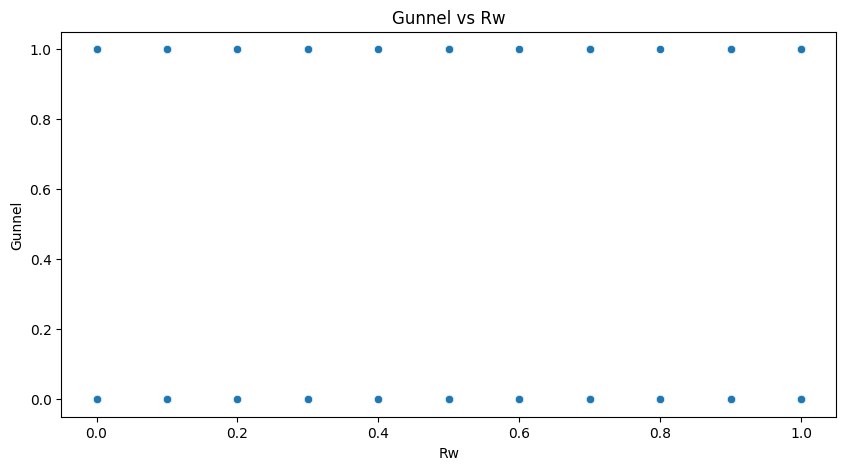

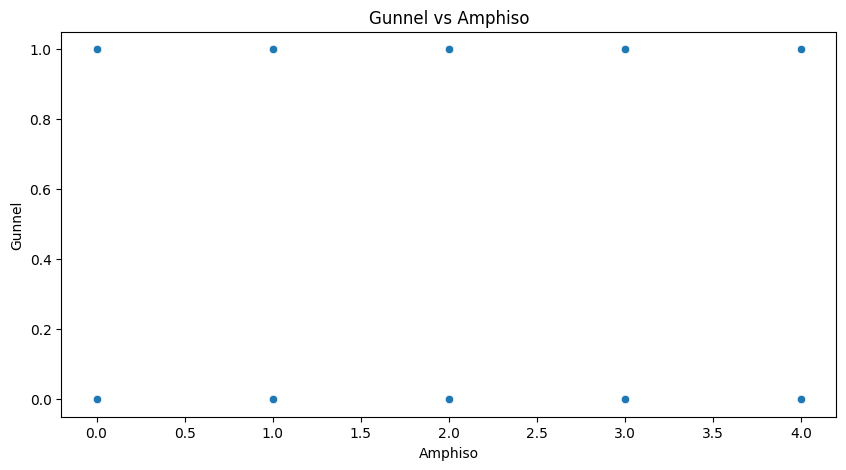

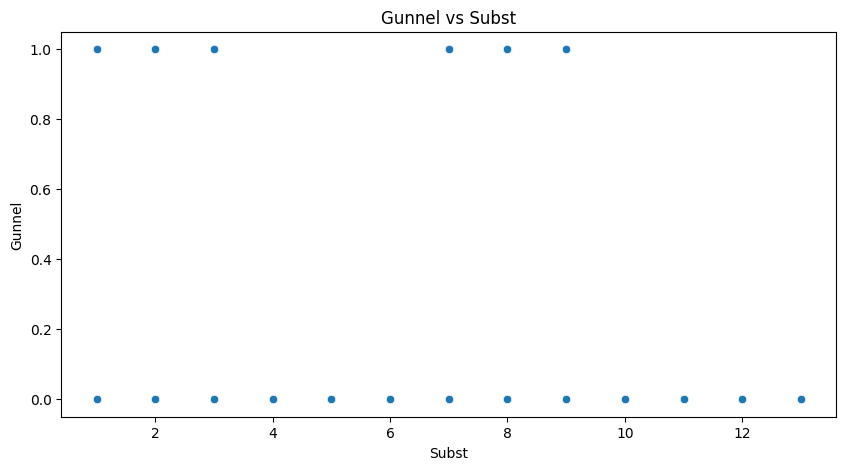

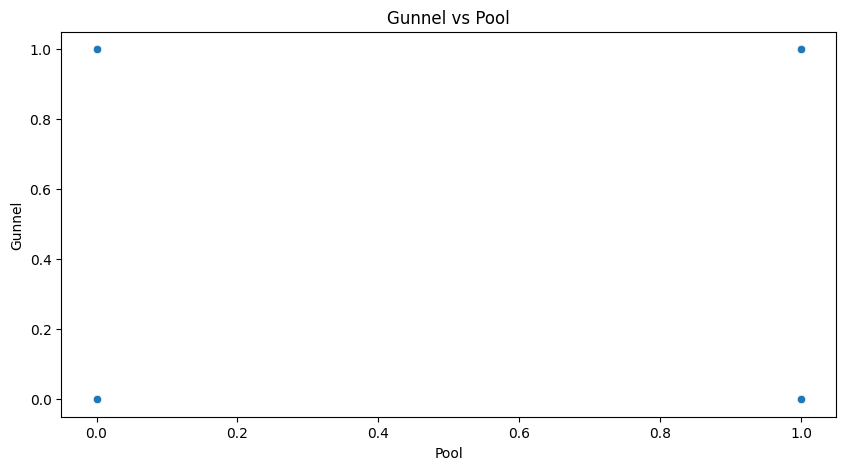

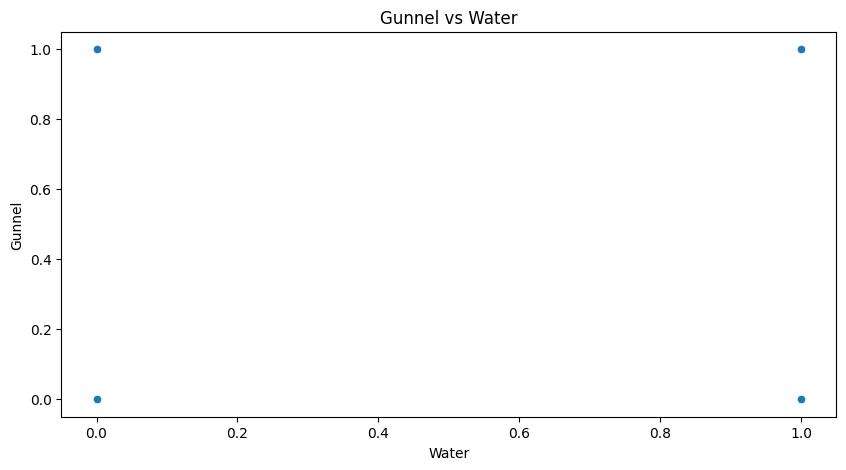

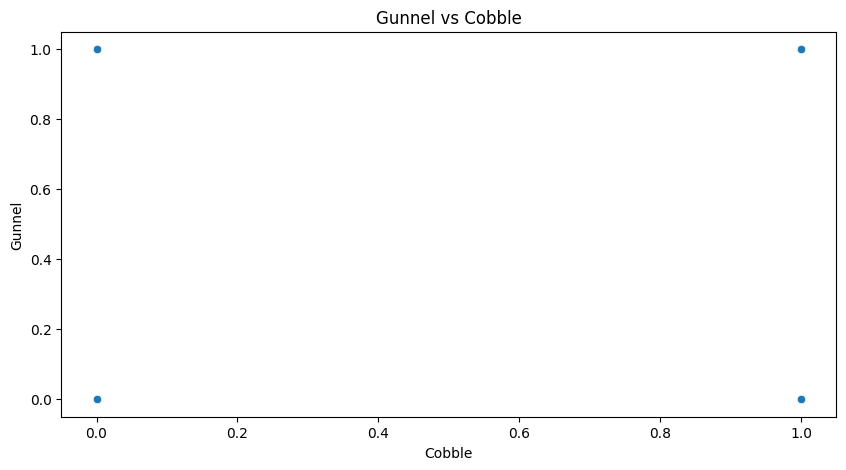

In [40]:
# 7. Bivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for each numerical feature vs the target variable 'Gunnel'
for column in data.columns:
    if column != 'Gunnel':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=data[column], y=data['Gunnel'])
        plt.title(f"Gunnel vs {column}")
        plt.xlabel(column)
        plt.ylabel("Gunnel")
        plt.show()



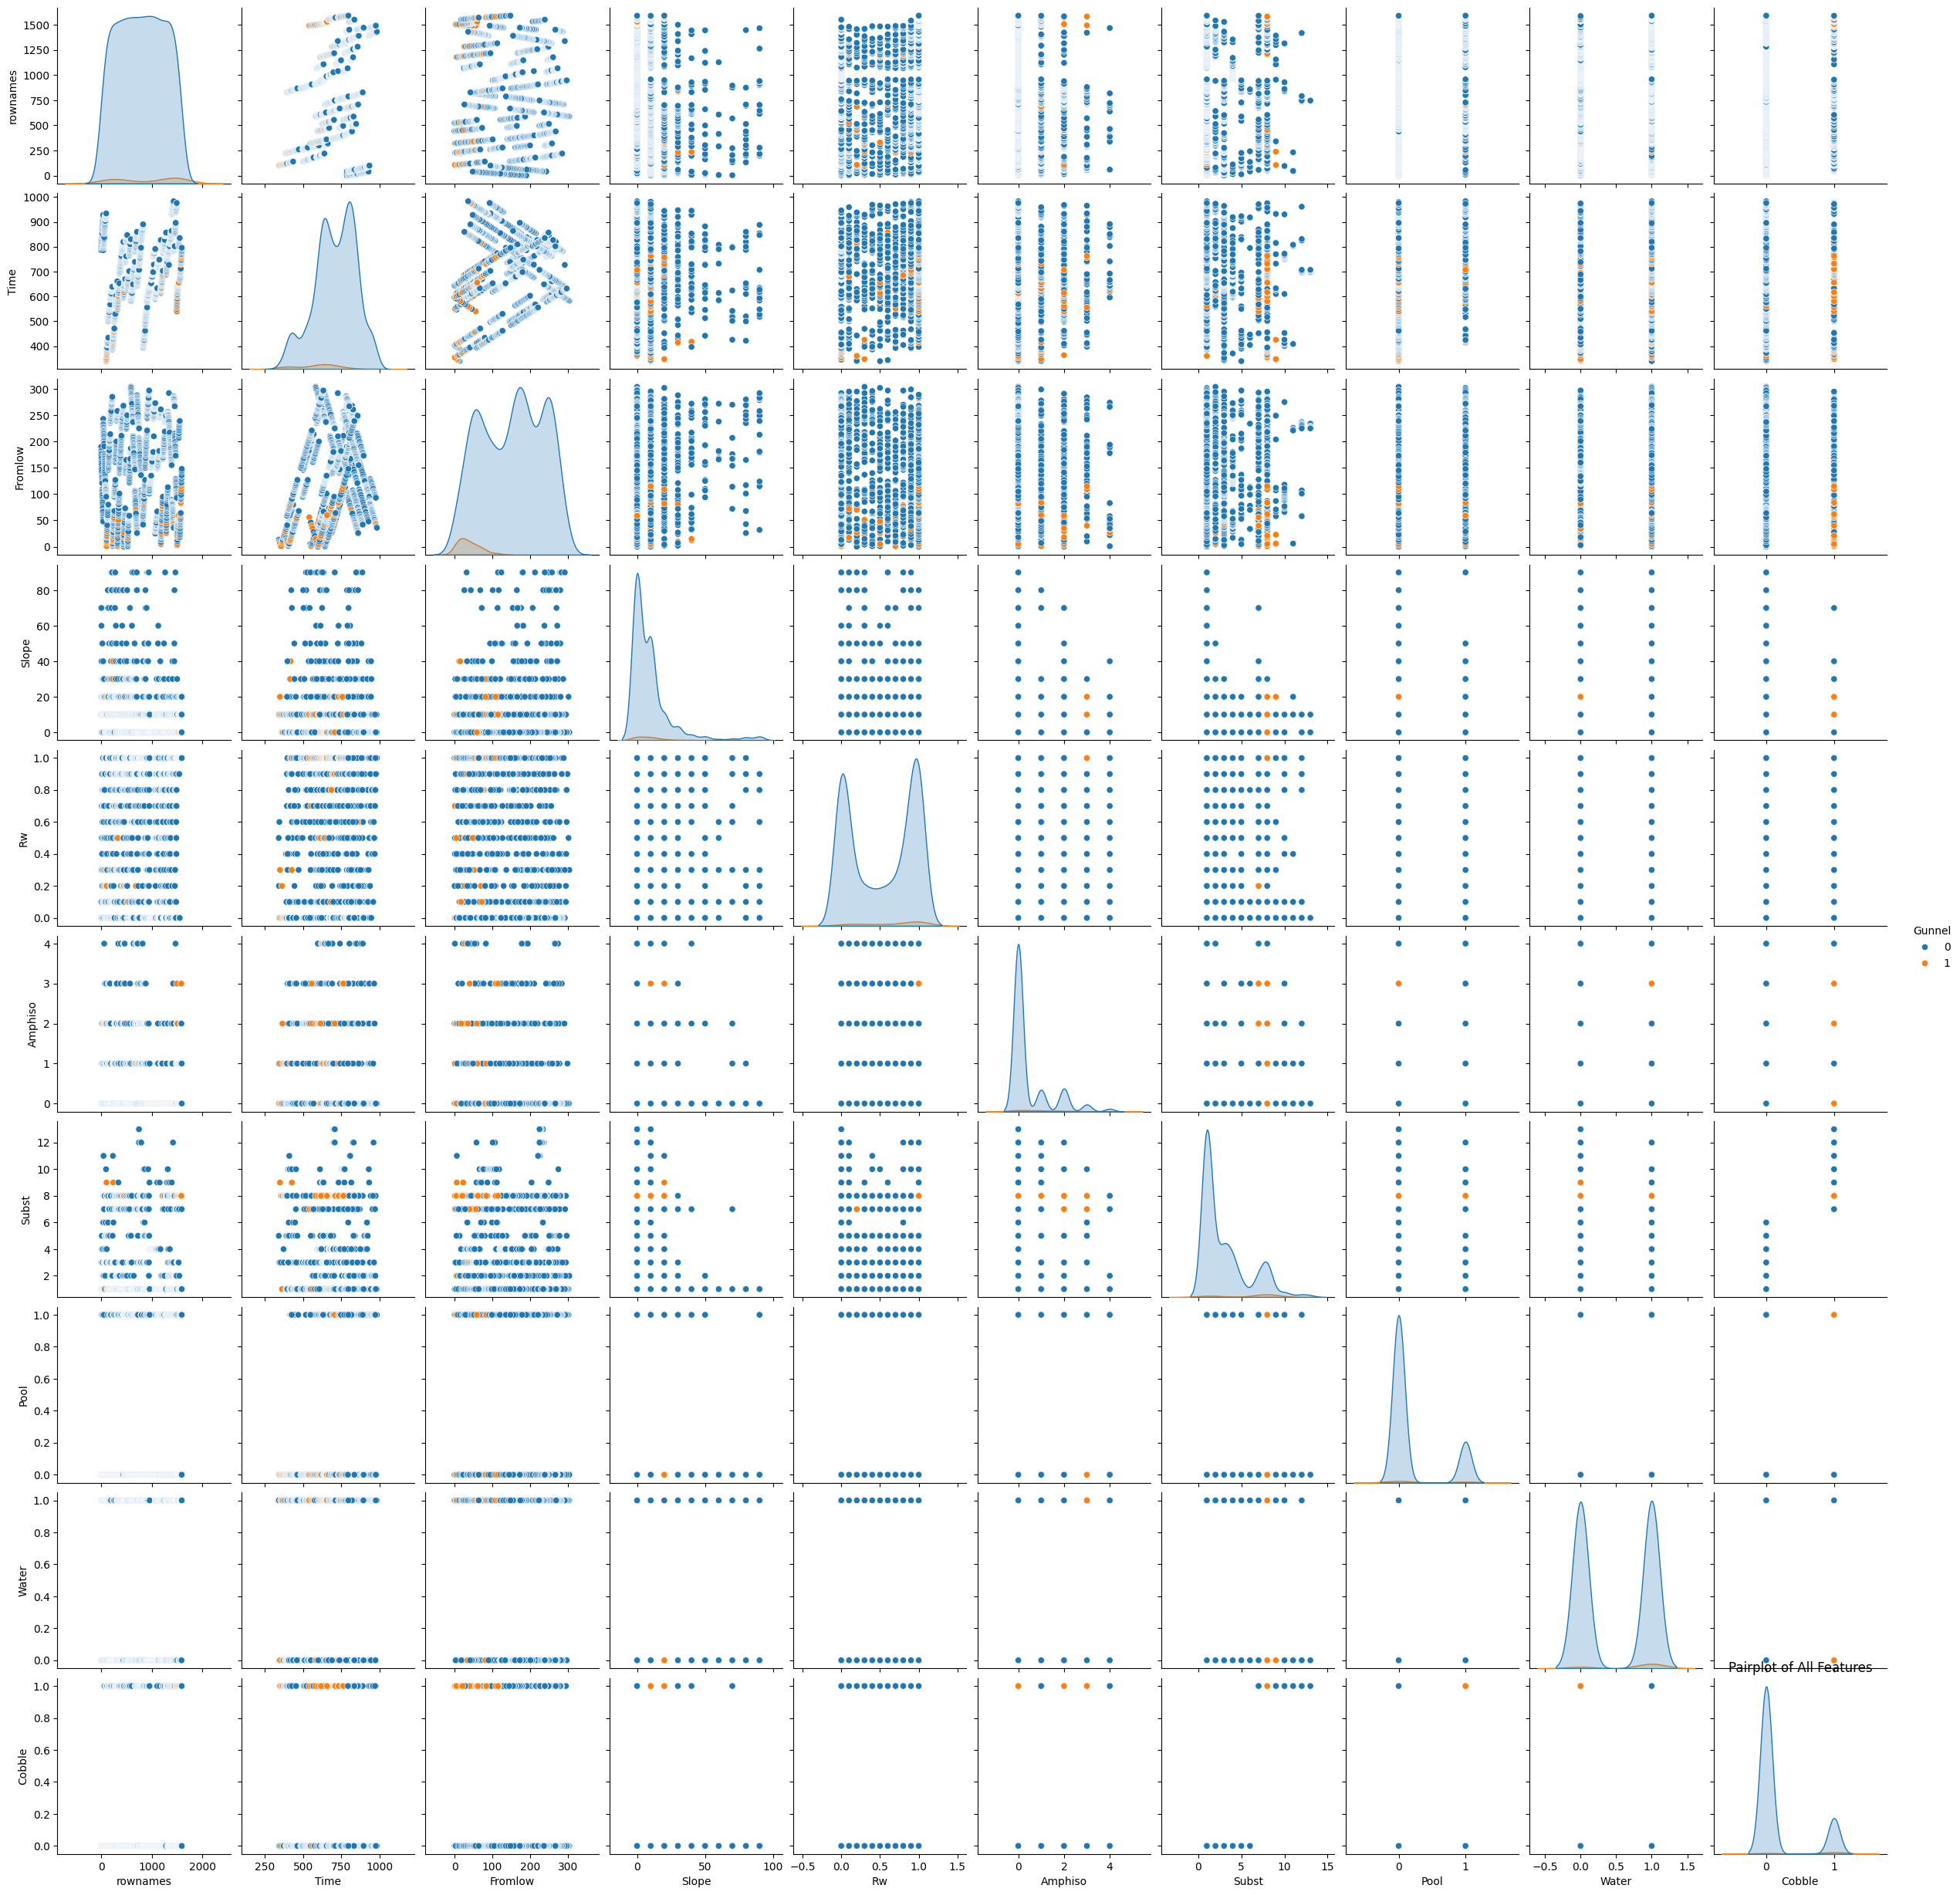

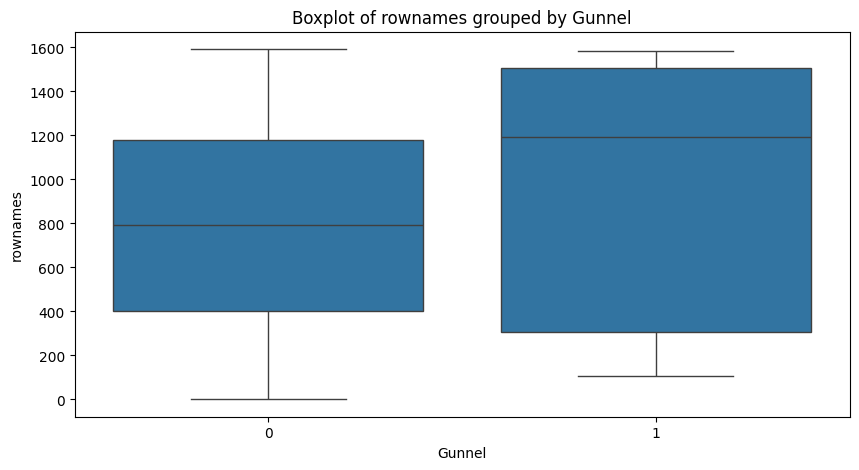

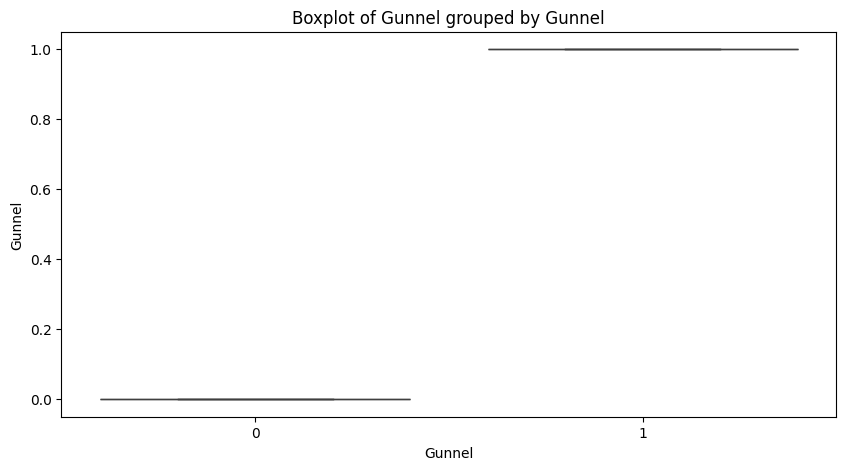

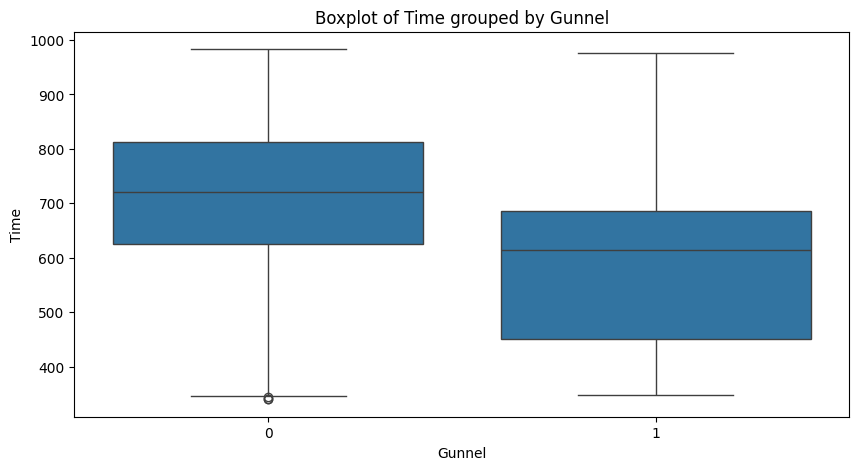

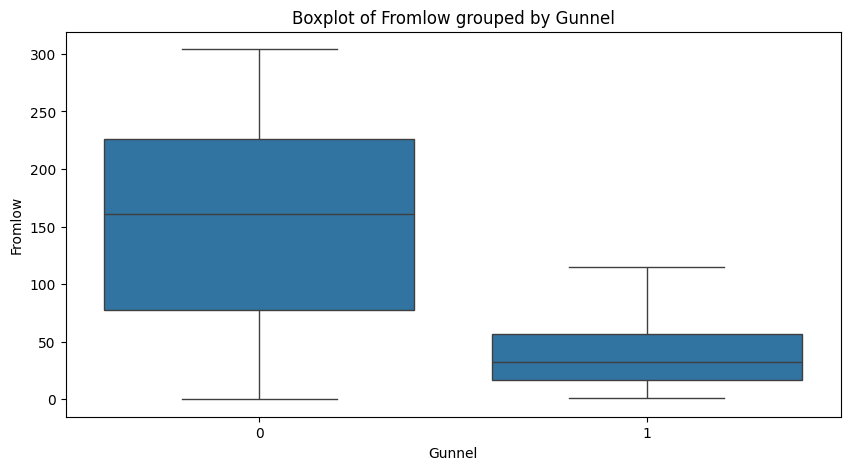

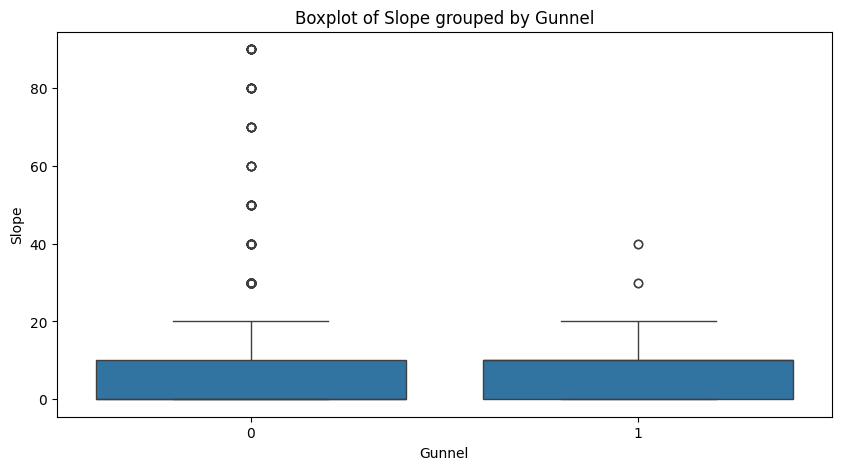

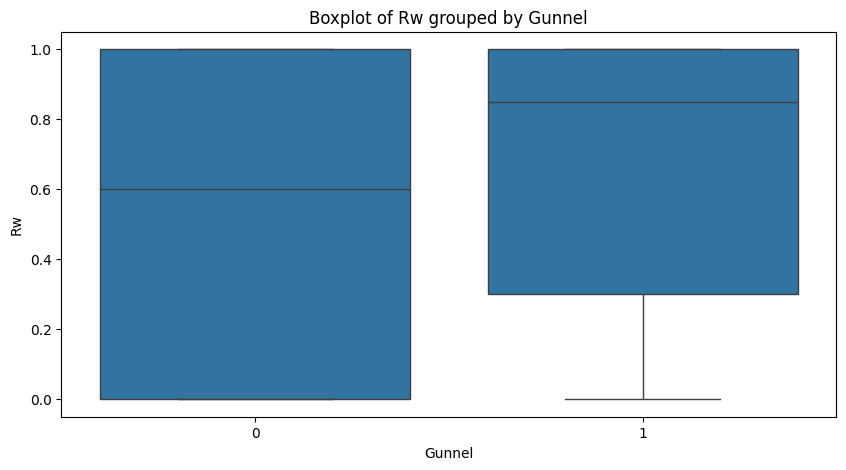

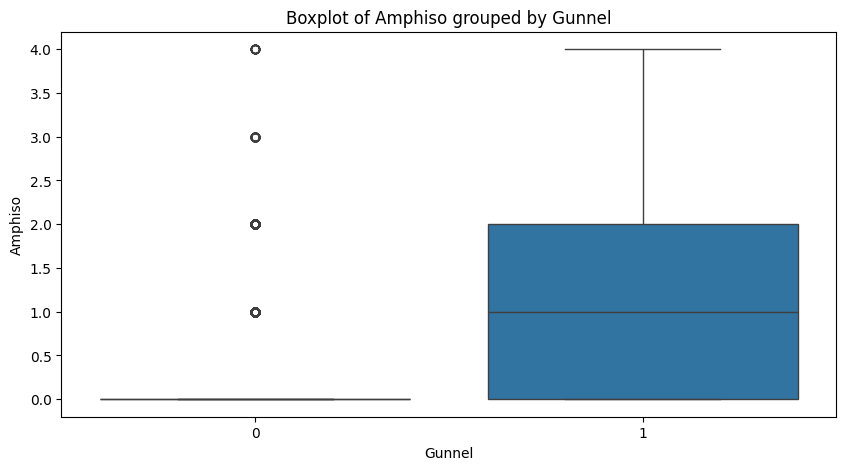

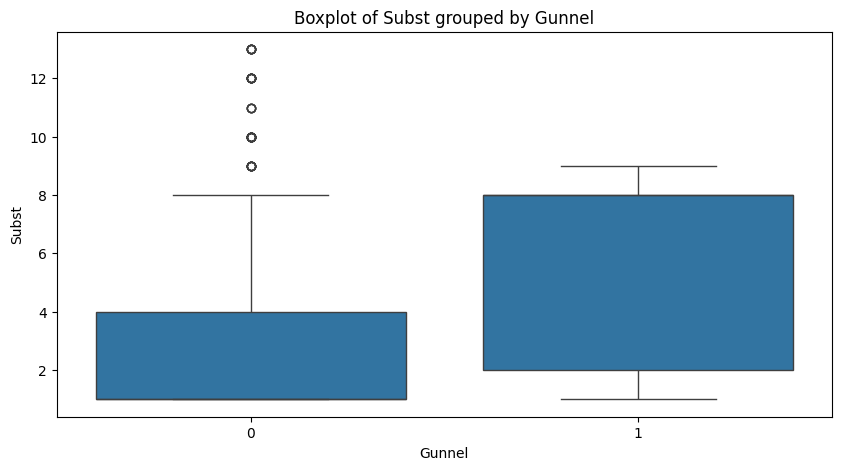

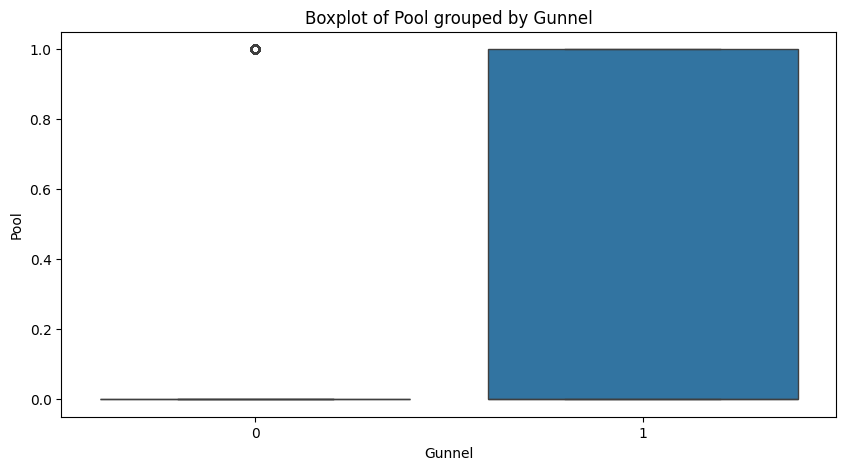

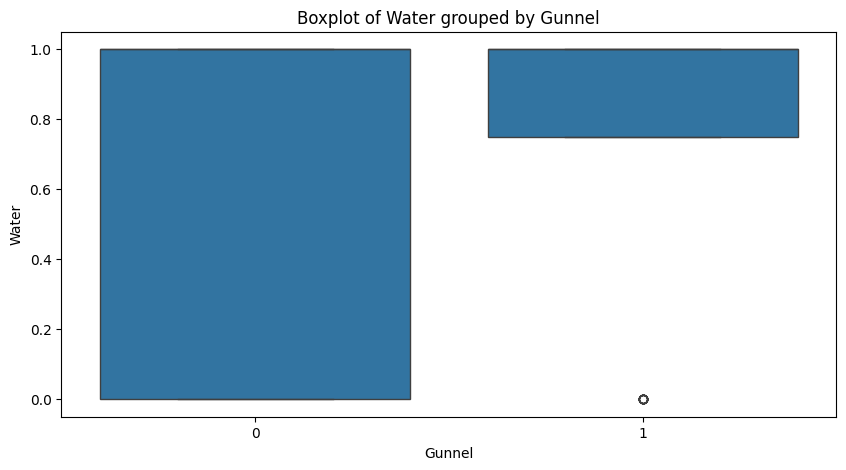

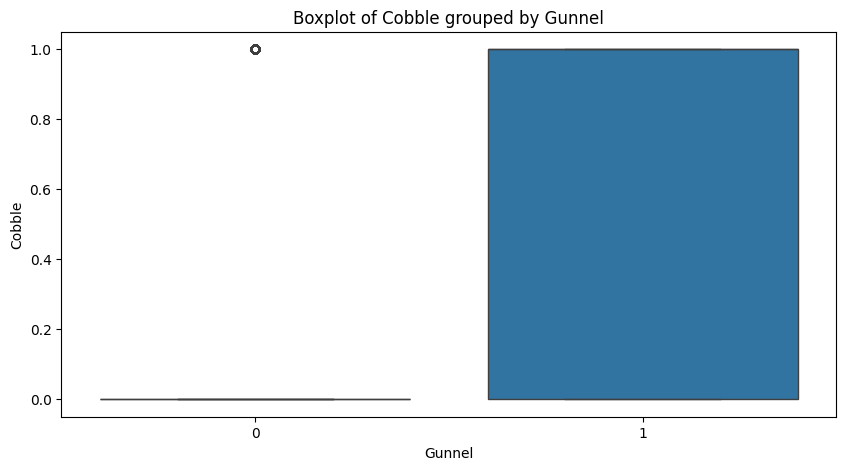

In [41]:
# 8. Multivariate Analysis
# Pairplot for all features
sns.pairplot(data, hue='Gunnel')
plt.title("Pairplot of All Features")
plt.show()

# Grouped boxplots to compare Gunnel across multiple features
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='Gunnel', y=column, data=data)
        plt.title(f"Boxplot of {column} grouped by Gunnel")
        plt.show()
